In [8]:
#Things to do before...
## Align genomes with mauve
## Extract orthologs with ID 35% Coverage 51%

In [3]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import numpy as np
import os
from os import listdir,walk
from os.path import isfile, join
path_to_files='../mauve_alignments/'
path_out="../dowstream_analyses_and_data/"


# Extract LCBs

In [4]:
counter=0
dic={}
with open(path_to_files+'ALL.xmfa') as f:
    lines=f.read().splitlines()
    for line in lines:
        if line[0]!='#':
            break
        genome=line.split('/')[-1]
        if genome[0]!='#':
            genome=genome[:-4].split('_')[0]
            if genome not in dic.values():
                dic[counter]=genome
                counter+=1
dic

{0: 'SUP05',
 1: 'Bathy',
 2: 'R.magnifica',
 3: 'R.fausta',
 4: 'R.pacifica',
 5: 'R.phaseoliformis',
 6: 'R.pliocardia',
 7: 'R.rectimargo',
 8: 'R.southwardae',
 9: 'V.diagonalis',
 10: 'V.extenta',
 11: 'V.soyoae1',
 12: 'V.soyoae2',
 13: 'V.gigas1',
 14: 'V.gigas2',
 15: 'V.okutanii',
 16: 'V.marissinica'}

In [16]:
df=pd.read_csv(path_to_files+'ALL.backbone',header=0,sep='\t')

for i in range(len(df.columns))[::2]:
    colname=dic[int(df.columns[i].split('_')[0].replace('seq',''))]
    print(colname)
    df[colname]=abs(df.iloc[:,i+1]-df.iloc[:,i])    

lcb=df[dic.values()]
lcb.to_csv(path_to_files+'ALL_LCBs.txt',sep='\t',index=False)
lcb

SUP05
Bathy
R.magnifica
R.fausta
R.pacifica
R.phaseoliformis
R.pliocardia
R.rectimargo
R.southwardae
V.diagonalis
V.extenta
V.soyoae1
V.soyoae2
V.gigas1
V.gigas2
V.okutanii
V.marissinica


,SUP05,Bathy,R.magnifica,R.fausta,R.pacifica,R.phaseoliformis,R.pliocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.soyoae1,V.soyoae2,V.gigas1,V.gigas2,V.okutanii,V.marissinica
0,0,0,24,26,26,26,26,26,26,0,0,0,0,0,0,0,0
1,26,0,26,26,26,26,26,26,26,0,0,0,0,0,0,0,0
2,36,0,0,0,0,37,37,0,36,0,0,0,0,0,0,0,0
3,10,0,0,10,10,10,10,10,10,0,0,0,0,0,0,0,0
4,807,810,0,0,0,825,0,0,819,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114
15890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60
15891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58
15892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68


# Read and parse ortholog file

In [2]:
######## read and parse ortholog file #########
genomes=['SUP05','Bathy','R.magnifica','R.fausta','R.pacifica','R.phaseoliformis','R.pliocardia','R.rectimargo','R.southwardae','V.diagonalis','V.extenta','V.soyoae1','V.soyoae2','V.gigas1','V.gigas2','V.okutanii','V.marissinica']
locus_tag_prefixes=['MS2017','SP60','HUE58','Rmag','Rpac','Rpha','Rpli','Rrec','Rsou','Vdia','Vext','Vsoy1','Vsoy2','Vgig1','Vgig2','COSY','Vmar']
path_to_files='../mauve_alignments/'

#pfx=dict(zip(locus_tag_prefixes,genomes))
idx_dict=dict(zip(range(len(genomes)),genomes))

ALL_raw=pd.read_csv(path_to_files+'ALL_id35cov51.orthologs',sep='\t',header=None,names=genomes)
ALL=pd.DataFrame([],columns=genomes, index=ALL_raw.index)

for idx in ALL_raw.index:
    for col in list(ALL_raw):
        if type(ALL_raw.loc[idx][col])!=float:
            column=ALL_raw.loc[idx][col].split(':')[0]
            value=ALL_raw.loc[idx][col].split(':')[1]
            ALL.loc[idx][idx_dict[int(column)]]=value
            

# ALL.to_csv(path_to_files+'Orthology_id35cov51.txt',header=True,sep='\t')  
# CORE.to_csv(path_to_files+'CoreOrthology_id35cov51.txt',header=True,sep='\t') 

In [3]:
## remove pseudogenes in refs
goodfiles={'Bathy':'../genomes/Bathy_complete_with_CRISPRannot.gbk',\
'R.fausta':'../genomes/R.fausta.gbk',\
'R.magnifica':'../genomes/R.magnifica.gbk',\
'R.pacifica':'../genomes/R.pacifica_one_contig_circular_fully_annotated.gbk',\
'R.phaseoliformis':'../genomes/R.phaseoliformis_8_contigs_fully_annotated.gbk',\
'R.pliocardia':'../genomes/R.pliocardia_one_contig_circular_fully_annotated.gbk',\
'R.rectimargo':'../genomes/R.rectimargo_one_contig_circular_fully_annotated.gbk',\
'R.southwardae':'../genomes/R.southwardae_39_contigs_fully_annotated.gbk',\
'SUP05':'../genomes/SUP05.gbk',\
'V.diagonalis':'../genomes/V.diagonalis_one_contig_circular_fully_annotated.gbk',\
'V.extenta':'../genomes/V.extenta_one_contig_circular_fully_annotated.gbk',\
'V.gigas1':'../genomes/V.gigas1_one_contig_circular_fully_annotated.gbk',\
'V.gigas2':'../genomes/V.gigas2_one_contig_circular_fully_annotated.gbk',\
'V.marissinica':'../genomes/V.marissinica_withlocustags.gbk',\
'V.okutanii':'../genomes/V.okutanii_with_locus_tags.gbk',\
'V.soyoae1':'../genomes/V.soyoae1_one_contig_circular_fully_annotated.gbk',\
'V.soyoae2':'../genomes/V.soyoae2_one_contig_circular_fully_annotated.gbk'}
pseudogenes=[]
size_dic={}
cds=[]
trna=[]
for sample in goodfiles.keys():
    for record in SeqIO.parse(goodfiles[sample],'genbank'):
            for feature in record.features:
                if feature.type in ['CDS','gene']:
                    locus_tag = feature.qualifiers['locus_tag'][0]
                    genesize=sorted([feature.location.start,feature.location.end])[1]-sorted([feature.location.start,feature.location.end])[0]
                    size_dic[locus_tag]=genesize
                    if 'pseudo' in feature.qualifiers: #verify if pseudogene
                        pseudogenes+=[locus_tag]
                if feature.type in ['CDS']:
                    cds+=[locus_tag]
                if feature.type in ['tRNA']:
                    trna+=[locus_tag]
                    
                        
print(len(pseudogenes))
pseudogenes=list(set(pseudogenes))
all_pseudogenes=pseudogenes

# ALL[ALL.isin(pseudogenes)] = np.nan
    
    
ALL['Count']=ALL[genomes].count(axis=1)
# ALL.to_csv('Orthology_id35cov51.txt',header=True,sep='\t')  

CORE=ALL[ALL['Count']==17][genomes]

# CORE.to_csv('CoreOrthology_id35cov51.txt',header=True,sep='\t') 
# pseudogenes
print(len(CORE)) # 727 (739 including refs pseudo)
print(len(ALL)) # 6084

/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/GenBank/Scanner.py:215: BiopythonParserWarning: Over indented source feature?
  BiopythonParserWarning,
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/GenBank/__init__.py:1398: BiopythonParserWarning: Expected sequence length 1021329, found 1023923 (Contig_1).
  BiopythonParserWarning,


446
747
6084


In [177]:
ALL.count(0)

SUP05               1636
Bathy               2172
R.magnifica         1116
R.fausta            1338
R.pacifica          1492
R.phaseoliformis    2242
R.pliocardia        1676
R.rectimargo        1510
R.southwardae       2066
V.diagonalis        1044
V.extenta           1033
V.soyoae1           1030
V.soyoae2           1020
V.gigas1            1046
V.gigas2            1017
V.okutanii           976
V.marissinica       1018
Count               6084
dtype: int64

In [4]:
##### remove pseudogenes in our genomes #### (CDS+RNA)
path_to_files='../mauve_alignments/'

## CDS

with open(path_to_files+'pseudogenes.txt','r') as f:
    lines=f.read().splitlines()

# print(len(lines))

## RNA

gr=pd.read_csv(path_to_files+'Orthogroups_fully_annotated.txt',header=0,sep='\t', index_col=0)
gr['B_thermophilus_symbiont'][0].split(',')
l=np.array(gr[gr.apply(lambda col: col.str.contains('_rna_', na=False), axis=1)].values.flatten())
l=l[~pd.isna(l)]
rna_pseudo=[v[1].replace('_pseudo','') for v in enumerate(l) if 'pseudo' in v[1]]
# print(rna_pseudo)
# lines+=rna_pseudo

all_pseudogenes+=lines

print(ALL[ALL.apply(lambda r: r.isin(rna_pseudo).any(), axis=1)])
# print(len(lines))

ALL[ALL.isin(all_pseudogenes)] = np.nan
print(ALL.count(0))  
    
ALL['Count']=ALL[genomes].count(axis=1)

ALL=ALL[ALL['Count']>0][genomes]
ALL['Count']=ALL[genomes].count(axis=1)
CORE=ALL[ALL['Count']==17][genomes]




print(len(ALL)) #3877 # 3878 with pseudo RNA
print(len(CORE)) #668 #669 with pseudo RNA
print(len(all_pseudogenes))

           SUP05        Bathy R.magnifica       R.fausta   R.pacifica  \
165   SP60_01355  MS2017_R027  Rmag_R0013  HUE58_RS01145  Rpac_rna_15   
345   SP60_03285  MS2017_R007  Rmag_R0035  HUE58_RS05070  Rpac_rna_22   
5307         NaN          NaN         NaN            NaN          NaN   

     R.phaseoliformis R.pliocardia R.rectimargo R.southwardae V.diagonalis  \
165       Rpha_rna_30  Rpli_rna_12   Rrec_rna_1   Rsou_rna_24  Vdia_rna_25   
345       Rpha_rna_29  Rpli_rna_19  Rrec_rna_12   Rsou_rna_33   Vdia_rna_5   
5307              NaN          NaN  Rrec_rna_28           NaN          NaN   

        V.extenta     V.soyoae1     V.soyoae2      V.gigas1      V.gigas2  \
165   Vext_rna_26  Vsoy1_rna_14  Vsoy2_rna_25  Vgig1_rna_23  Vgig2_rna_19   
345    Vext_rna_6  Vsoy1_rna_33   Vsoy2_rna_7  Vgig1_rna_33  Vgig2_rna_29   
5307          NaN           NaN           NaN           NaN           NaN   

      V.okutanii V.marissinica  Count  
165          NaN    Vmar_R0013     16  
345  

In [5]:
ALL.count(0)

SUP05               1502
Bathy               1969
R.magnifica          994
R.fausta            1065
R.pacifica          1139
R.phaseoliformis    1484
R.pliocardia        1240
R.rectimargo        1182
R.southwardae       1451
V.diagonalis         941
V.extenta            935
V.soyoae1            986
V.soyoae2            967
V.gigas1             972
V.gigas2             968
V.okutanii           956
V.marissinica        966
Count               3878
dtype: int64

In [92]:
ALL.to_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',header=True,sep='\t')
ALL.to_csv(path_out+'Orthology_id35cov51_nopseudo.txt',header=True,sep='\t')
CORE.to_csv(path_to_files+'CoreOrthology_id35cov51_nopseudo.txt',header=True,sep='\t') 

In [8]:
with open(path_to_files+'ALL_pseudogenes.txt','w') as fa:
    fa.write('\n'.join(all_pseudogenes))

In [1]:
# ALL_raw=pd.read_csv(path_to_files+'ALL_id35cov51.orthologs',sep='\t',header=None,names=genomes)
# ALL=pd.DataFrame([],columns=genomes, index=ALL_raw.index)

# for idx in ALL_raw.index:
#     for col in list(ALL_raw):
#         if type(ALL_raw.loc[idx][col])!=float:
#             column=ALL_raw.loc[idx][col].split(':')[0]
#             value=ALL_raw.loc[idx][col].split(':')[1]
#             ALL.loc[idx][idx_dict[int(column)]]=value
            
            
# ALL_size=ALL.replace(size_dic)

# pseudo_dic=dict(zip(all_pseudogenes, [ps+'_pseudo' for ps in all_pseudogenes]))
# ALL2=ALL.replace(pseudo_dic)
# ALL2.to_csv(path_to_files+'Orthology_id35cov51_pseudoflag.txt',header=True,sep='\t')

# ALL2[ALL2.apply(lambda r: r.isin([ps+'_pseudo' for ps in pseudogenes]).any(), axis=1)][:100]
# idx=ALL2[ALL2.apply(lambda r: r.isin([ps+'_pseudo' for ps in pseudogenes]).any(), axis=1)].index
# ALL_size.loc[idx][:100]

In [113]:
ALL=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',sep='\t',header=0,index_col=0)
CDS=ALL[ALL.apply(lambda r: r.isin(cds).any(), axis=1)]

ALL.count(0)

SUP05               1502
Bathy               1969
R.magnifica          994
R.fausta            1065
R.pacifica          1138
R.phaseoliformis    1484
R.pliocardia        1239
R.rectimargo        1180
R.southwardae       1451
V.diagonalis         940
V.extenta            934
V.soyoae1            985
V.soyoae2            967
V.gigas1             972
V.gigas2             968
V.okutanii           956
V.marissinica        966
Count               3877
dtype: int64

In [178]:
ALL=pd.read_csv(path_to_files+'Orthology_id35cov51.txt',sep='\t',header=0,index_col=0)
ALL_size=ALL.replace(size_dic)

# CDS=ALL[ALL.apply(lambda r: r.isin(cds).any(), axis=1)]

# CDS.count(0)

In [179]:
print(len([l for l in lines if l[:6]=='HUE58_']))
# print([l for l in lines if l[:6]=='HUE58_'])
print(len([l for l in pseudogenes if l[:6]=='HUE58_']))
s1=set([l for l in lines if l[:6]=='HUE58_'])
s2=set([l for l in pseudogenes if l[:6]=='HUE58_'])

ALL[ALL.apply(lambda r: r.isin(list(s1-s2)).any(), axis=1)]



274
93


,SUP05,Bathy,R.magnifica,R.fausta,R.pacifica,R.phaseoliformis,R.pliocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.soyoae1,V.soyoae2,V.gigas1,V.gigas2,V.okutanii,V.marissinica
55,SP60_00395,MS2017_1144,Rmag_0465,HUE58_RS01985,NaN,Rpha_peg_322,Rpli_peg_1276,NaN,Rsou_peg_1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,SP60_01555,MS2017_1668,NaN,HUE58_RS04060,Rpac_peg_571,Rpha_peg_1559,Rpli_peg_758,Rrec_peg_360,Rsou_peg_1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,SP60_04140,MS2017_0063,NaN,HUE58_RS05755,Rpac_peg_205,Rpha_peg_1053,Rpli_peg_1564,Rrec_peg_727,Rsou_peg_470,Vdia_peg_961,Vext_peg_949,Vsoy1_peg_49,Vsoy2_peg_253,Vgig1_peg_33,Vgig2_peg_935,COSY_0023,Vmar_0025
462,SP60_04300,MS2017_2123,Rmag_0049,HUE58_RS05960,Rpac_peg_166,Rpha_peg_791,Rpli_peg_1511,Rrec_peg_767,Rsou_peg_587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,SP60_05515,MS2017_1793,Rmag_0219,HUE58_RS00450,Rpac_peg_335,Rpha_peg_2197,Rpli_peg_84,Rrec_peg_244,Rsou_peg_1015,Vdia_peg_772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,NaN,NaN,NaN,HUE58_RS04975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3732,NaN,NaN,NaN,HUE58_RS05575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3733,NaN,NaN,NaN,HUE58_RS05865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3736,NaN,NaN,NaN,HUE58_RS06160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
ALL_size[ALL_size.apply(lambda r: r.isin(list(s1-s2)).any(), axis=1)]

,SUP05,Bathy,R.magnifica,R.fausta,R.pacifica,R.phaseoliformis,R.pliocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.soyoae1,V.soyoae2,V.gigas1,V.gigas2,V.okutanii,V.marissinica


# Venn diagram

x total: 2805
y total: 4219
z total: 1244
x only: 1626
y only: 2972
z only: 235
x-y total overlap: 1175
x-z total overlap: 937
y-z total overlap: 1005
x-y only overlap: 242
x-z only overlap: 4
y-z only overlap: 72
x-y-z overlap: 933
245.6349509662216
275.96052154586675
181.5067464208984
120.20964775998709
68.38859554048467


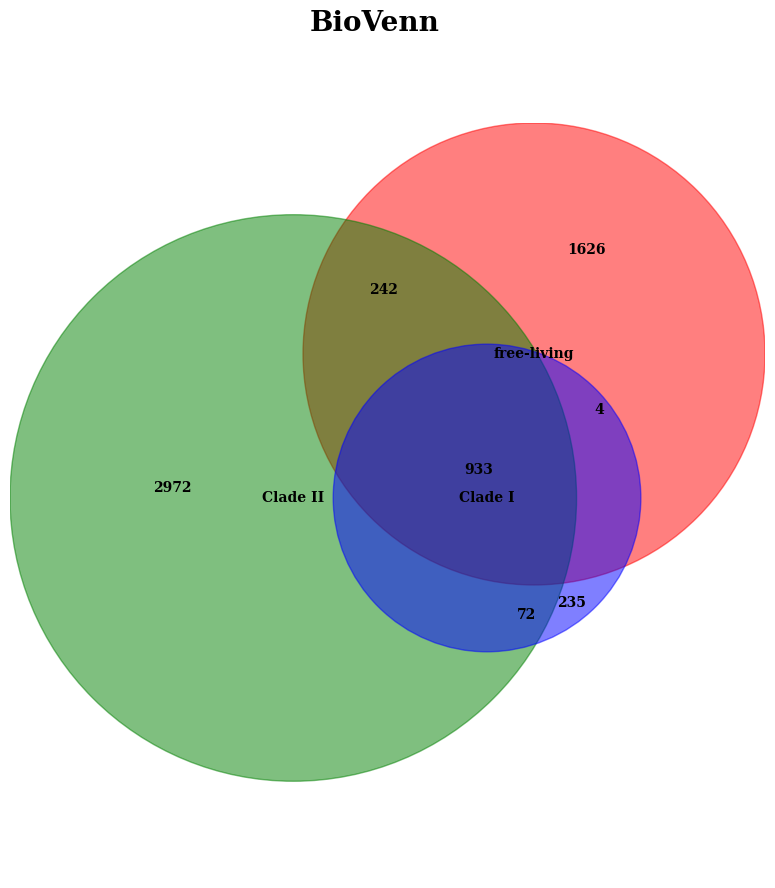

In [50]:
## with pseudos
#http://www.interactivenn.net/
df=pd.read_csv(path_to_files+'Orthology_id35cov51.txt',header=0,index_col=0,sep='\t')

df['gene_number']=df.index.values
# print( df.columns)
dic={}
dic['FL']=['Bathy','SUP05']
dic['Bathy']=['Bathy']
dic['SUP05']=['SUP05']
dic['Ruthia']=['R.magnifica','R.fausta', 'R.pacifica','R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae']
dic['Gigas']=['V.diagonalis', 'V.extenta', 'V.soyoae1','V.soyoae2', 'V.gigas1','V.gigas2','V.okutanii','V.marissinica']

#fa=open(path_to_files+'input_ivenn_id35cov51.2.txt','w')
#fa.close()

for k,v in dic.items():
    d=df[['gene_number']+v]

    pan=df[v].dropna(how='all',axis=0).index
    pan_entry=k+':'+','.join([str(v) for v in pan])+';\n'

    core=df[v].dropna(how='any',axis=0).index
    core_entry=k+'_core'+':'+','.join([str(v) for v in core])+';\n'

    #fa=open(path_to_files+'input_ivenn_id35cov51.2.txt','a')
    #fa.write(pan_entry)
    #fa.write(core_entry)
    #fa.close()
    
from BioVenn import draw_venn
dic.keys()
gig_all=list(df[dic['Gigas']].dropna(how='all',axis=0).index.values)
rut_all=list(df[dic['Ruthia']].dropna(how='all',axis=0).index.values)
fl_all=list(df[dic['FL']].dropna(how='all',axis=0).index.values)

# biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='svg',filename=path_to_files+'biovenn_id35cov51.svg')
biovenn = draw_venn(fl_all,rut_all,gig_all, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_id35cov51_pan.pdf')

x total: 2502
y total: 2375
z total: 1096
x only: 1372
y only: 1204
z only: 125
x-y total overlap: 1125
x-z total overlap: 925
y-z total overlap: 966
x-y only overlap: 205
x-z only overlap: 5
y-z only overlap: 46
x-y-z overlap: 920
209.17804804835365
249.42390679729465
211.55427318681822
132.558114801133
88.656641037206
303 1844 148
x total: 303
y total: 1844
z total: 148
x only: 294
y only: 1819
z only: 130
x-y total overlap: 9
x-z total overlap: 2
y-z total overlap: 18
x-y only overlap: 7
x-z only overlap: 0
y-z only overlap: 16
x-y-z overlap: 2
321.9207340077117
318.32697222816853
129.03393746336897
138.6392457263961
10.246950765959598


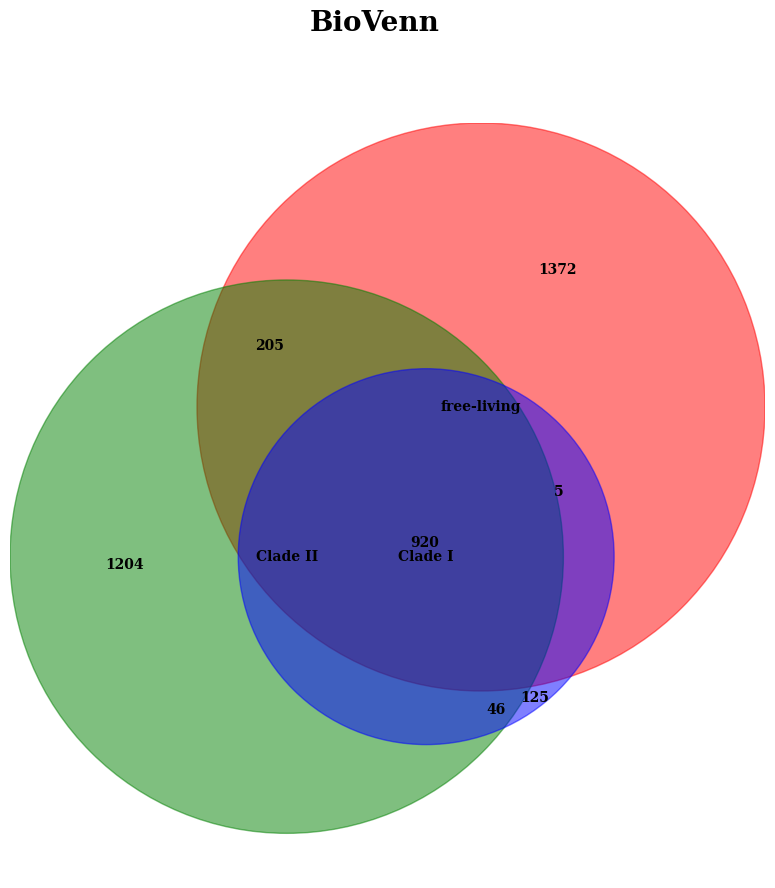

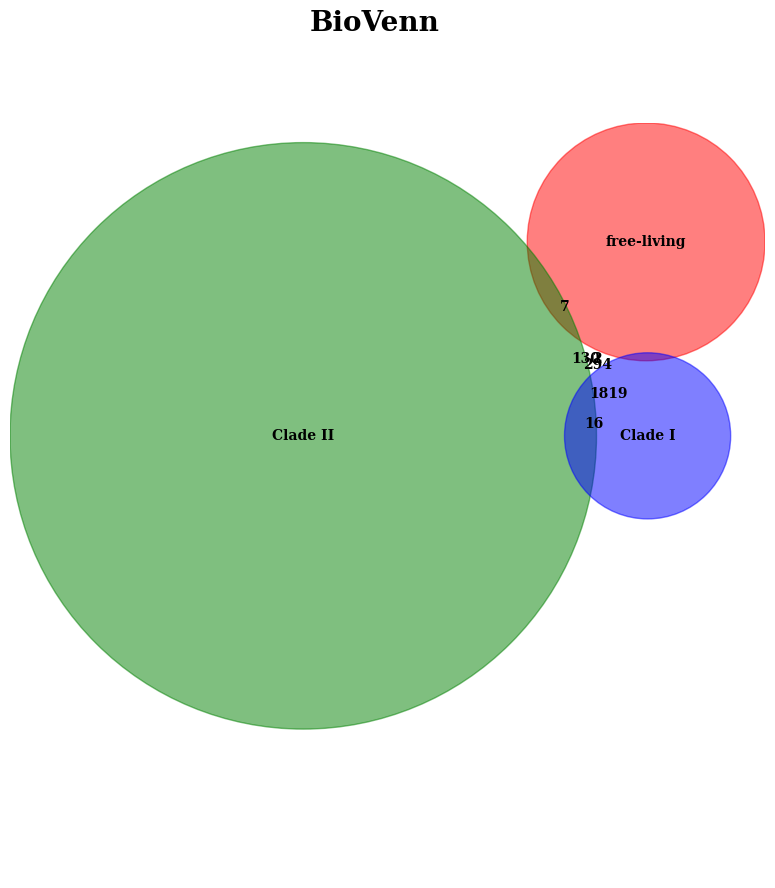

In [51]:
## no pseudos
#http://www.interactivenn.net/
df=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',header=0,index_col=0,sep='\t')

df['gene_number']=df.index.values
# print( df.columns)
dic={}
dic['FL']=['Bathy','SUP05']
dic['Bathy']=['Bathy']
dic['SUP05']=['SUP05']
dic['Ruthia']=['R.magnifica','R.fausta', 'R.pacifica','R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae']
dic['Gigas']=['V.diagonalis', 'V.extenta', 'V.soyoae1','V.soyoae2', 'V.gigas1','V.gigas2','V.okutanii','V.marissinica']

fa=open(path_to_files+'input_ivenn_id35cov51_nopseudo2.txt','w')
fa.close()

for k,v in dic.items():
    d=df[['gene_number']+v]

    pan=df[v].dropna(how='all',axis=0).index
    pan_entry=k+':'+','.join([str(v) for v in pan])+';\n'

    core=df[v].dropna(how='any',axis=0).index
    core_entry=k+'_core'+':'+','.join([str(v) for v in core])+';\n'

    fa=open(path_to_files+'input_ivenn_id35cov51_nopseudo2.txt','a')
    fa.write(pan_entry)
    #fa.write(core_entry)
    fa.close()
    
from BioVenn import draw_venn
dic.keys()
gig_nops=list(df[dic['Gigas']].dropna(how='all',axis=0).index.values)
rut_nops=list(df[dic['Ruthia']].dropna(how='all',axis=0).index.values)
fl_nops=list(df[dic['FL']].dropna(how='all',axis=0).index.values)

biovenn = draw_venn(fl_nops,rut_nops,gig_nops, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_id35cov51_nopseudo_pan.pdf')

gig_ps=list(set(gig_all)-set(gig_nops))
rut_ps=list(set(rut_all)-set(rut_nops))
fl_ps=list(set(fl_all)-set(fl_nops))

print(len(fl_ps),len(rut_ps),len(gig_ps))
biovenn = draw_venn(fl_ps,rut_ps,gig_ps, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_id35cov51_pseudo_pan.pdf')


x total: 2350
y total: 2971
z total: 1153
x only: 929
y only: 1519
z only: 126
x-y total overlap: 1420
x-z total overlap: 995
y-z total overlap: 1026
x-y only overlap: 426
x-z only overlap: 1
y-z only overlap: 32
x-y-z overlap: 994
241.94872727642564
281.32149347824367
206.42148589984797
121.4140721944153
93.68030742904295


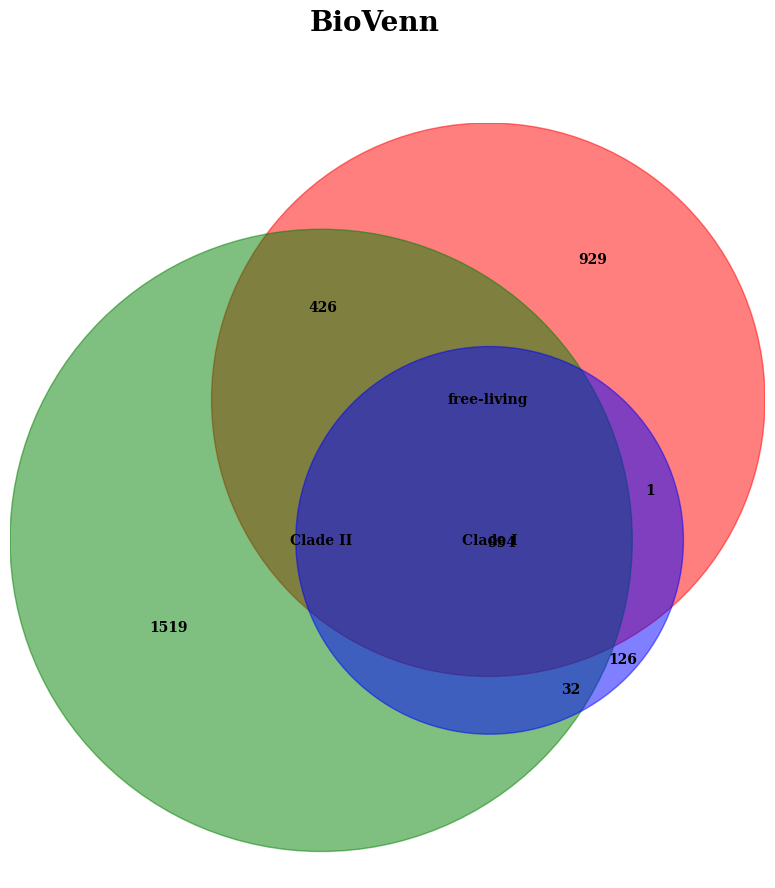

In [4]:
# no pseudos
#http://www.interactivenn.net/
import pandas as pd
df=pd.read_csv(path_to_files+'Orthogroups_fully_annotated.txt',header=0,index_col=0,sep='\t')

df['gene_number']=df.index.values
# print( df.columns)
dic={}
dic['FL']=['B_thermophilus_symbiont','T_autotrophicus']
dic['Bathy']=['B_thermophilus_symbiont']
dic['SUP05']=['T_autotrophicus']
dic['Ruthia']=['R_magnifica','R_fausta', 'R_pacifica','R_phaseoliformis', 'R_pliocardia', 'R_rectimargo', 'R_southwardae']
dic['Gigas']=['V_diagonalis', 'V_extenta', 'V_soyoae1','V_soyoae2', 'V_gigas1','V_gigas2','V_okutanii','V_marissinica']

fa=open(path_to_files+'input_ivenn_orthogroups.txt','w')
fa.close()

for k,v in dic.items():
    d=df[['gene_number']+v]

    pan=df[v].dropna(how='all',axis=0).index
    pan_entry=k+':'+','.join([str(v) for v in pan])+';\n'

    core=df[v].dropna(how='any',axis=0).index
    core_entry=k+'_core'+':'+','.join([str(v) for v in core])+';\n'

    fa=open(path_to_files+'input_ivenn_orthogroups.txt','a')
    fa.write(pan_entry)
    #fa.write(core_entry)
    fa.close()
    
from BioVenn import draw_venn
dic.keys()
gig=list(df[dic['Gigas']].dropna(how='all',axis=0).index.values)
rut=list(df[dic['Ruthia']].dropna(how='all',axis=0).index.values)
fl=list(df[dic['FL']].dropna(how='all',axis=0).index.values)

# biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='svg',filename=path_to_files+'biovenn_orthogroups.svg')
# biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_orthogroups.pdf')
biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='svg')


x total: 1153
y total: 960
z total: 948
x only: 199
y only: 14
z only: 36
x-y total overlap: 904
x-z total overlap: 870
y-z total overlap: 862
x-y only overlap: 84
x-z only overlap: 50
y-z only overlap: 42
x-y-z overlap: 820
200.76650268230142
189.5669967673088
212.97882958578234
50.24615038708703
163.1165227682346


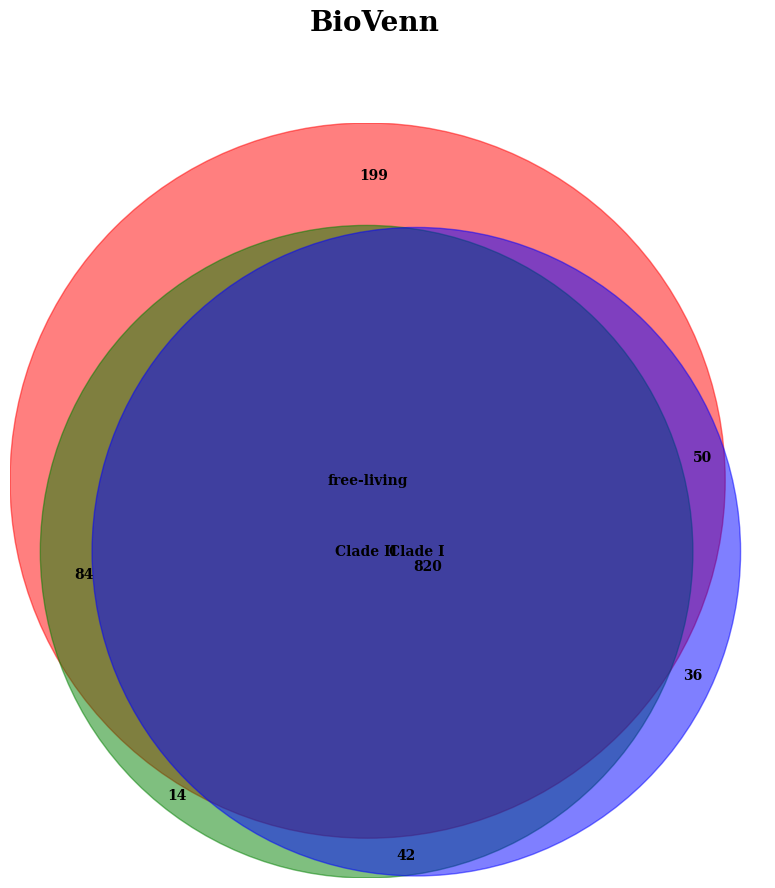

In [6]:
#### no pseudos
#http://www.interactivenn.net/
df=pd.read_csv(path_to_files+'Orthogroups_fully_annotated.txt',header=0,index_col=0,sep='\t')

df['gene_number']=df.index.values
# print( df.columns)
dic={}
dic['FL']=['B_thermophilus_symbiont','T_autotrophicus']
dic['Bathy']=['B_thermophilus_symbiont']
dic['SUP05']=['T_autotrophicus']
dic['Ruthia']=['R_magnifica','R_fausta', 'R_pacifica','R_phaseoliformis', 'R_pliocardia', 'R_rectimargo', 'R_southwardae']
dic['Gigas']=['V_diagonalis', 'V_extenta', 'V_soyoae1','V_soyoae2', 'V_gigas1','V_gigas2','V_okutanii','V_marissinica']

fa=open(path_to_files+'input_ivenn_orthogroups.txt','w')
fa.close()
    
from BioVenn import draw_venn
dic.keys()
gig=list(df[dic['Gigas']].dropna(how='any',axis=0).index.values)
rut=list(df[dic['Ruthia']].dropna(how='any',axis=0).index.values)
fl=list(df[dic['FL']].dropna(how='any',axis=0).index.values)

# biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='svg',filename=path_to_files+'biovenn_orthogroups.svg')
biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_orthogroups_core.pdf')
# biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I')


x total: 1003
y total: 902
z total: 927
x only: 134
y only: 21
z only: 48
x-y total overlap: 809
x-z total overlap: 807
y-z total overlap: 819
x-y only overlap: 62
x-z only overlap: 60
y-z only overlap: 72
x-y-z overlap: 747
172.707284507884
160.1460328078929
192.92936686990444
45.79852564089026
147.6651617681029


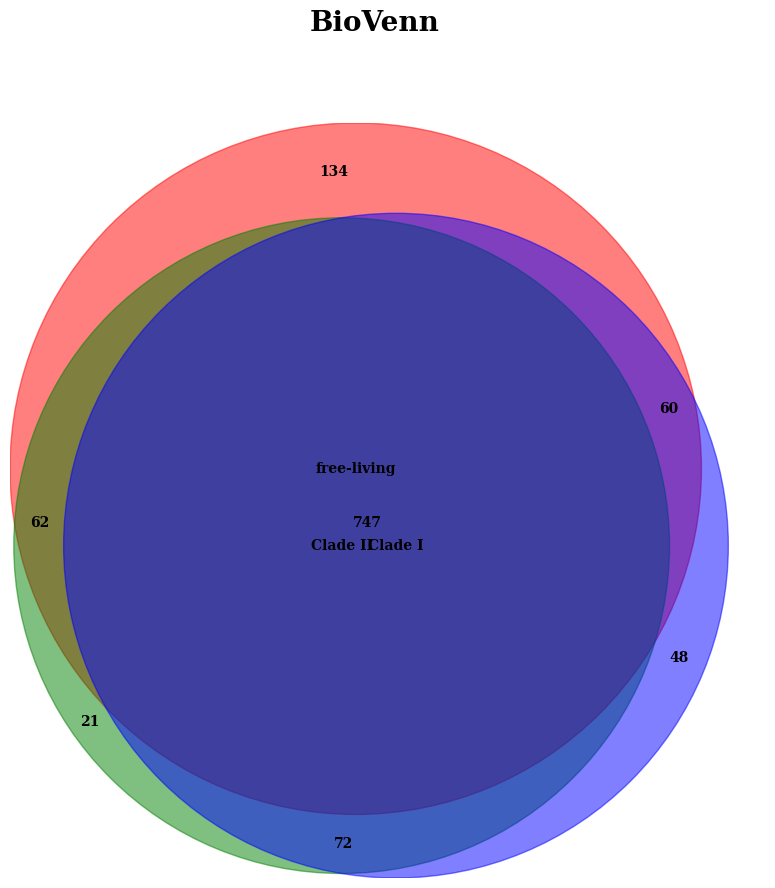

In [48]:
## with pseudos
#http://www.interactivenn.net/
df=pd.read_csv(path_to_files+'Orthology_id35cov51.txt',header=0,index_col=0,sep='\t')

df['gene_number']=df.index.values
# print( df.columns)
dic={}
dic['FL']=['Bathy','SUP05']
dic['Bathy']=['Bathy']
dic['SUP05']=['SUP05']
dic['Ruthia']=['R.magnifica','R.fausta', 'R.pacifica','R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae']
dic['Gigas']=['V.diagonalis', 'V.extenta', 'V.soyoae1','V.soyoae2', 'V.gigas1','V.gigas2','V.okutanii','V.marissinica']
    
from BioVenn import draw_venn
dic.keys()
gig_all=list(df[dic['Gigas']].dropna(how='any',axis=0).index.values)
rut_all=list(df[dic['Ruthia']].dropna(how='any',axis=0).index.values)
fl_all=list(df[dic['FL']].dropna(how='any',axis=0).index.values)

# biovenn = draw_venn(fl,rut,gig, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='svg',filename=path_to_files+'biovenn_id35cov51.svg')
biovenn = draw_venn(fl_all,rut_all,gig_all, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_id35cov51_core.pdf')

34 75 66
x total: 969
y total: 827
z total: 861
x only: 150
y only: 15
z only: 44
x-y total overlap: 741
x-z total overlap: 746
y-z total overlap: 739
x-y only overlap: 73
x-z only overlap: 78
y-z only overlap: 71
x-y-z overlap: 668
170.08316041719672
157.14650298271079
204.36785550843967
54.31666800611856
150.60876468519353


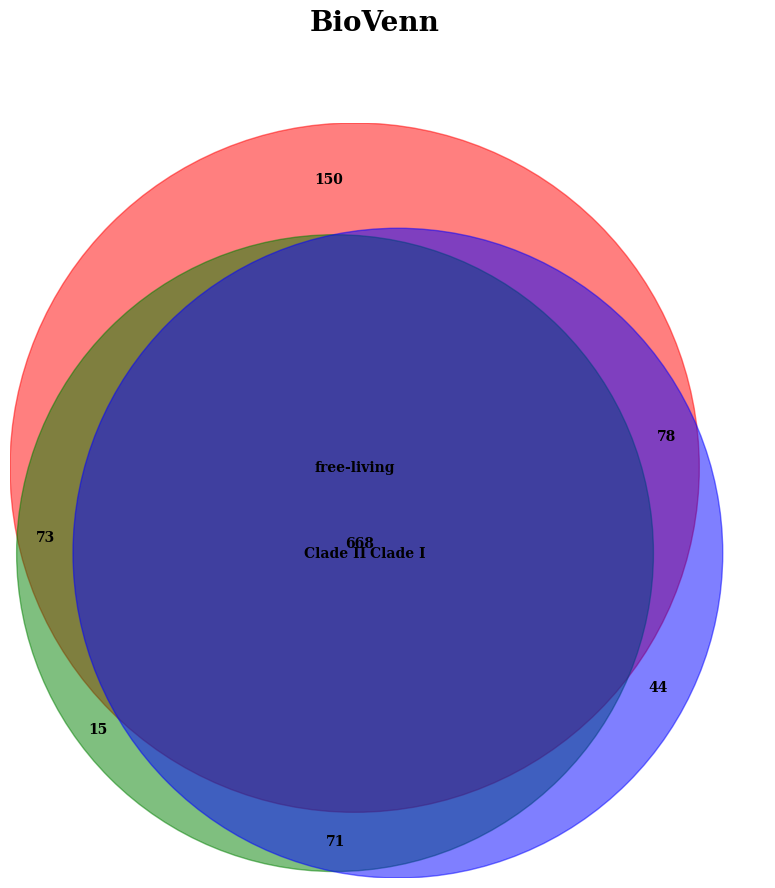

x total: 34
y total: 75
z total: 66
x only: 26
y only: 52
z only: 44
x-y total overlap: 6
x-z total overlap: 5
y-z total overlap: 20
x-y only overlap: 3
x-z only overlap: 2
y-z only overlap: 17
x-y-z overlap: 3
206.745293788229
208.1832041404559
156.02966760006862
135.21623495394329
20.85665361461421


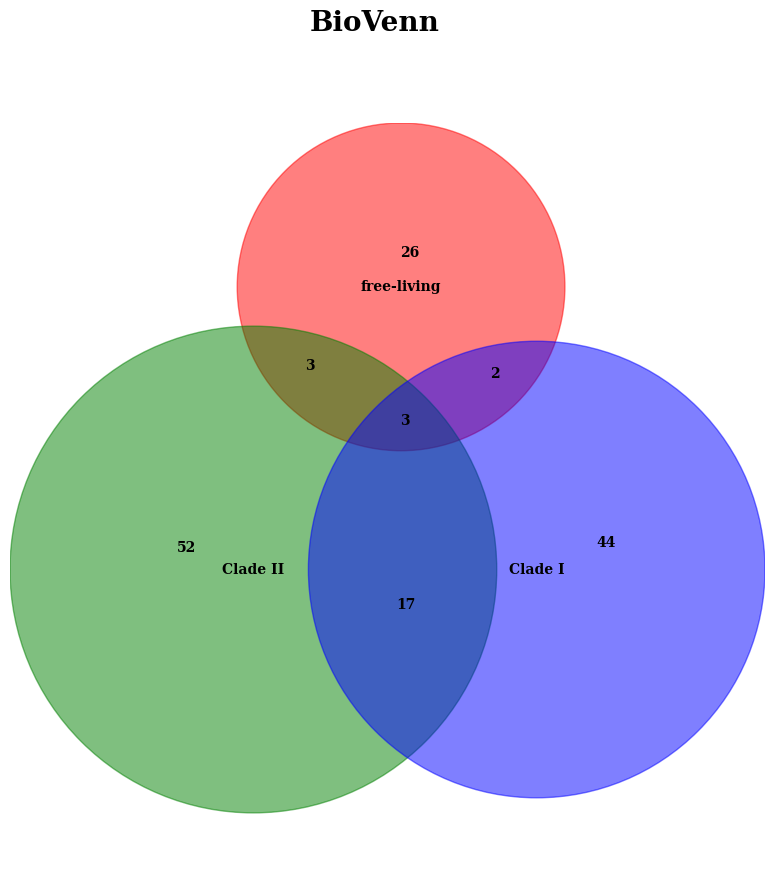

In [49]:
## no pseudos
#http://www.interactivenn.net/
df=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',header=0,index_col=0,sep='\t')

df['gene_number']=df.index.values
# print( df.columns)
dic={}
dic['FL']=['Bathy','SUP05']
dic['Bathy']=['Bathy']
dic['SUP05']=['SUP05']
dic['Ruthia']=['R.magnifica','R.fausta', 'R.pacifica','R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae']
dic['Gigas']=['V.diagonalis', 'V.extenta', 'V.soyoae1','V.soyoae2', 'V.gigas1','V.gigas2','V.okutanii','V.marissinica']

fa=open(path_to_files+'input_ivenn_id35cov51_nopseudo2.txt','w')
fa.close()

from BioVenn import draw_venn
dic.keys()
gig_nops=list(df[dic['Gigas']].dropna(how='any',axis=0).index.values)
rut_nops=list(df[dic['Ruthia']].dropna(how='any',axis=0).index.values)
fl_nops=list(df[dic['FL']].dropna(how='any',axis=0).index.values)


gig_ps=list(set(gig_all)-set(gig_nops))
rut_ps=list(set(rut_all)-set(rut_nops))
fl_ps=list(set(fl_all)-set(fl_nops))

print(len(fl_ps),len(rut_ps),len(gig_ps))
biovenn = draw_venn(fl_nops,rut_nops,gig_nops, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I')

biovenn = draw_venn(fl_ps,rut_ps,gig_ps, subtitle="", nrtype="abs",xtitle='free-living',ytitle='Clade II',ztitle='Clade I',output='pdf',filename=path_to_files+'biovenn_id35cov51_pseudo_core.pdf')


In [9]:
## Parse ivenn data
with open(path_to_files+'ivenn_id35cov51_nopseudo.txt') as f :
    lines=f.read().splitlines()
    lines=[[line.split(': ')[0],len(line.split(': ')[1].split(','))] for line in lines]
lines
tot_FL=sum([category[1] for category in lines if 'FL' in category[0]])
tot_Ruthia=sum([category[1] for category in lines if 'Ruthia' in category[0]])
tot_Gigas=sum([category[1] for category in lines if 'Gigas' in category[0]])
print('tot_FL = '+str(tot_FL),'tot_Ruthia = '+str(tot_Ruthia),'tot_Gigas = '+str(tot_Gigas))
lines

tot_FL = 2502 tot_Ruthia = 2376 tot_Gigas = 1096


[['[FL]', 1336],
 ['[Ruthia]', 1202],
 ['[Gigas]', 120],
 ['[Ruthia] and [Gigas]', 13],
 ['[Gigas] and [Gigas_core]', 5],
 ['[FL] and [FL_core]', 36],
 ['[FL] and [Ruthia]', 94],
 ['[Ruthia] and [Ruthia_core]', 3],
 ['[FL] and [Gigas] and [Gigas_core]', 4],
 ['[FL] and [FL_core] and [Gigas] and [Gigas_core]', 1],
 ['[FL] and [Ruthia] and [Gigas]', 14],
 ['[FL] and [FL_core] and [Ruthia] and [Gigas]', 33],
 ['[FL] and [Ruthia] and [Gigas] and [Gigas_core]', 21],
 ['[FL] and [FL_core] and [Ruthia] and [Gigas] and [Gigas_core]', 77],
 ['[FL] and [Ruthia] and [Ruthia_core] and [Gigas]', 5],
 ['[FL] and [FL_core] and [Ruthia] and [Ruthia_core] and [Gigas]', 49],
 ['[FL] and [FL_core] and [Ruthia] and [Ruthia_core] and [Gigas] and [Gigas_core]',
  669],
 ['[FL] and [Ruthia] and [Ruthia_core] and [Gigas] and [Gigas_core]', 52],
 ['[Ruthia] and [Ruthia_core] and [Gigas] and [Gigas_core]', 19],
 ['[Ruthia] and [Gigas] and [Gigas_core]', 14],
 ['[FL] and [Ruthia] and [Ruthia_core]', 7],
 ['[FL] 

In [30]:
# including pseudos

#http://www.interactivenn.net/
df=pd.read_csv(path_to_files+'Orthology_id35cov51.txt',header=0,index_col=0,sep='\t')
df.iloc[782]

SUP05                  SP60_06775
Bathy                 MS2017_1570
R.magnifica                   NaN
R.fausta                      NaN
R.pacifica                    NaN
R.phaseoliformis              NaN
R.pliocardia                  NaN
R.rectimargo                  NaN
R.southwardae                 NaN
V.diagonalis         Vdia_peg_320
V.extenta            Vext_peg_312
V.soyoae1           Vsoy1_peg_685
V.soyoae2           Vsoy2_peg_885
V.gigas1            Vgig1_peg_274
V.gigas2            Vgig2_peg_162
V.okutanii              COSY_0649
V.marissinica           Vmar_0657
Name: 782, dtype: object

In [23]:

dic={}
dic['FL']=['Bathy','SUP05']
dic['Ruthia']=['R.magnifica','R.fausta', 'R.pacifica','R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae']
dic['Gigas']=['V.diagonalis', 'V.extenta', 'V.soyoae1','V.soyoae2', 'V.gigas1','V.gigas2','V.okutanii','V.marissinica']

fa=open(path_to_files+'input_ivenn_id35cov51.txt','w')
fa.close()

for k,v in dic.items():

    pan=df[v].dropna(how='all',axis=0).index
    pan_entry=k+':'+','.join([str(v) for v in pan])+';\n'

    core=df[v].dropna(how='any',axis=0).index
    core_entry=k+'_core'+':'+','.join([str(v) for v in core])+';\n'

    fa=open(path_to_files+'input_ivenn_id35cov51.txt','a')
    fa.write(pan_entry)
    fa.write(core_entry)
    fa.close()

In [24]:
## Parse ivenn data
with open(path_to_files+'ivenn_id35cov51.txt') as f :
    lines=f.read().splitlines()
    lines=[[line.split(': ')[0],len(line.split(': ')[1].split(','))] for line in lines]
lines
tot_FL=sum([category[1] for category in lines if 'FL' in category[0]])
tot_Ruthia=sum([category[1] for category in lines if 'Ruthia' in category[0]])
tot_Gigas=sum([category[1] for category in lines if 'Gigas' in category[0]])
print('tot_FL = '+str(tot_FL),'tot_Ruthia = '+str(tot_Ruthia),'tot_Gigas = '+str(tot_Gigas))
lines

tot_FL = 2805 tot_Ruthia = 4219 tot_Gigas = 1244


[['[FL]', 1593],
 ['[Ruthia]', 2966],
 ['[Gigas]', 229],
 ['[Ruthia] and [Gigas]', 36],
 ['[Gigas] and [Gigas_core]', 6],
 ['[FL] and [FL_core]', 33],
 ['[FL] and [Ruthia]', 112],
 ['[Ruthia] and [Ruthia_core]', 6],
 ['[FL] and [Gigas] and [Gigas_core]', 3],
 ['[FL] and [FL_core] and [Gigas] and [Gigas_core]', 1],
 ['[FL] and [Ruthia] and [Gigas]', 4],
 ['[FL] and [FL_core] and [Ruthia] and [Gigas]', 16],
 ['[FL] and [Ruthia] and [Gigas] and [Gigas_core]', 21],
 ['[FL] and [FL_core] and [Ruthia] and [Gigas] and [Gigas_core]', 59],
 ['[FL] and [Ruthia] and [Ruthia_core] and [Gigas]', 4],
 ['[FL] and [FL_core] and [Ruthia] and [Ruthia_core] and [Gigas]', 28],
 ['[FL] and [FL_core] and [Ruthia] and [Ruthia_core] and [Gigas] and [Gigas_core]',
  747],
 ['[FL] and [Ruthia] and [Ruthia_core] and [Gigas] and [Gigas_core]', 54],
 ['[Ruthia] and [Ruthia_core] and [Gigas] and [Gigas_core]', 18],
 ['[Ruthia] and [Gigas] and [Gigas_core]', 18],
 ['[FL] and [Ruthia] and [Ruthia_core]', 11],
 ['[FL]

# Extract core sequences and align them

In [3]:

########### CORE: retreive sequences from GBK, align aa, backtranslate and output fna; 715 sequences ##########
from Bio import AlignIO
from Bio.codonalign import build
from Bio.Alphabet import Gapped,IUPAC
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Align.Applications import MuscleCommandline,ClustalwCommandline
import subprocess
import sys

# os.mkdir('./fna')
# os.mkdir('./faa')


goodfiles={'Bathy':'../genomes/Bathy_complete_with_CRISPRannot.gbk',\
'R.fausta':'../genomes/R.fausta.gbk',\
'R.magnifica':'../genomes/R.magnifica.gbk',\
'R.pacifica':'../genomes/R.pacifica_one_contig_circular_fully_annotated.gbk',\
'R.phaseoliformis':'../genomes/R.phaseoliformis_8_contigs_fully_annotated.gbk',\
'R.pliocardia':'../genomes/R.pliocardia_one_contig_circular_fully_annotated.gbk',\
'R.rectimargo':'../genomes/R.rectimargo_one_contig_circular_fully_annotated.gbk',\
'R.southwardae':'../genomes/R.southwardae_39_contigs_fully_annotated.gbk',\
'SUP05':'../genomes/SUP05.gbk',\
'V.diagonalis':'../genomes/V.diagonalis_one_contig_circular_fully_annotated.gbk',\
'V.extenta':'../genomes/V.extenta_one_contig_circular_fully_annotated.gbk',\
'V.gigas1':'../genomes/V.gigas1_one_contig_circular_fully_annotated.gbk',\
'V.gigas2':'../genomes/V.gigas2_one_contig_circular_fully_annotated.gbk',\
'V.marissinica':'../genomes/V.marissinica_withlocustags.gbk',\
'V.okutanii':'../genomes/V.okutanii_with_locus_tags.gbk',\
'V.soyoae1':'../genomes/V.soyoae1_one_contig_circular_fully_annotated.gbk',\
'V.soyoae2':'../genomes/V.soyoae2_one_contig_circular_fully_annotated.gbk'}

CORE=pd.read_csv(path_to_files+'CoreOrthology_id35cov51.txt',header=0,sep='\t',index_col=0)

# for i in range(688,len(CORE)):
for i in [81,280,525,526,533,687]:
    gene=CORE.iloc[i]
    gene_name=CORE.iloc[i]['R.magnifica']
    if gene_name.split('_')[1][0]=='R':
        continue
    fna=[]
    faa=[]
    print(i,gene_name)
    for sample in sorted(gene.index):
        for record in SeqIO.parse(goodfiles[sample],'genbank'):
            for feature in record.features:
                if feature.type=='CDS':
                    locus_tag = feature.qualifiers['locus_tag'][0]
                    if locus_tag == CORE.iloc[i][sample]:
#                         if locus_tag == gene_name:
#                             product= feature.qualifiers['product'][0]
#                             print gene_name, product
#                             df=df.append({'gene':gene_name,'product':product}, ignore_index=True)
                        
                        
                        ### create SeqRecord object ####
                        DNAseq=feature.location.extract(record).seq
                        if locus_tag == gene_name:
                            print(len(DNAseq))
                        try:
                            AAseq=Seq(feature.qualifiers['translation'][0],alphabet=Gapped(IUPAC.extended_protein))
                        except KeyError:
                            print(feature)
#                             AAseq=feature.extract(record).translate(11)
#                             AAseq.id=locus_tag
#                             print(AAseq.seq)
                        header='|'.join([sample,CORE.iloc[i][sample]])

                        fna_seq = SeqRecord(DNAseq,id=header)
                        faa_seq = SeqRecord(AAseq,id=header)
                        
                        fna.append(fna_seq)
                        faa.append(faa_seq)                  

    faa=[f for f in sorted(faa, key=lambda x : x.id)]
    SeqIO.write(faa, path_to_files+'faa/'+gene_name+'.faa', "fasta")
    
#     muscle_cline = MuscleCommandline('/cvmfs/soft.computecanada.ca/easybuild/software/2017/avx512/Compiler/gcc7.3/muscle/3.8.31/bin/muscle',input='fna/'+gene_name+'.fasta', out='fna/aligned_'+gene_name+'.faa')
#     muscle_cline()
#     align = AlignIO.read('fna/aligned_'+gene_name+'.faa', "fasta",alphabet=Gapped(IUPAC.extended_protein))

#     stdout, stderr = muscle_cline()
#     align = AlignIO.read(StringIO(stdout), "fasta")
#     print(align)

    ### run MUSCLE ####
    muscle_cline = MuscleCommandline(clwstrict=True)
    child = subprocess.Popen(str(muscle_cline),
                             stdin=subprocess.PIPE,
                             stdout=subprocess.PIPE,
                             stderr=subprocess.PIPE,
                             universal_newlines=True,
                             shell=(sys.platform!="win32"))
    SeqIO.write(faa, child.stdin, "fasta")
    child.stdin.close()
    align = AlignIO.read(child.stdout, "clustal",alphabet=Gapped(IUPAC.extended_protein))
    aln = MultipleSeqAlignment([f for f in sorted(align, key=lambda x : x.id)])
    codon_aln = build(aln, fna)

#     SeqIO.write(aln, path_to_files+'faa/aligned_'+gene_name+'.faa', "fasta")
    SeqIO.write(codon_aln, path_to_files+'fna/aligned_'+gene_name+'.fna', "fasta")

/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:27: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


81 Rmag_0392
3825


ValueError: No records found in handle

# Extra stuff

In [47]:
### Look for discrepancies between Corinas core orthogroups and this orthology
print(len(ALL)) #3877 # 3878 with pseudo RNA
print(len(CORE)) #668 #669 with pseudo RNA

path_to_files='../mauve_alignments/'


ALL=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',sep='\t', index_col=0)
ALL=ALL[['R.fausta','V.marissinica','Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1','Count']]
# print(ALL[:5])
CORE_nopseudo=ALL[ALL['Count']==17]['R.magnifica'].values
print('len core no_pseudo',len(CORE_nopseudo))

CORE_orthogroup=pd.read_csv(path_to_files+'Core_orthogroups_N0.txt',sep='\t')
CORE_orthogroup.columns=['Bathy', 'R.fausta', 'R.magnifica', 'R.pacifica',
       'R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae',
       'SUP05', 'V.diagonalis', 'V.extenta', 'V.gigas1', 'V.gigas2',
       'V.marissinica', 'V.okutanii', 'V.soyoae1', 'V.soyoae2']
print('len core orthogroup no_pseudo',len(CORE_orthogroup))

print('in orthogroups only',len(set(CORE_orthogroup['R.magnifica'].values)-set(CORE_nopseudo)))
print('in positional orthology only',len(set(CORE_nopseudo)-set(CORE_orthogroup['R.magnifica'].values)))


# For those that are found in both dataset, is the orthology the same?
intersec_core=set(CORE_nopseudo).intersection(set(CORE_orthogroup['R.magnifica'].values))

CORE2=CORE_orthogroup[CORE_orthogroup.apply(lambda r: r.isin(intersec_core).any(), axis=1)].sort_values('R.magnifica')
CORE2['R.pliocardia'] = CORE2['R.pliocardia'].str.replace('Rple','Rpli')
CORE2=CORE2[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis','R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis','V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1','V.soyoae1']]
core2_str=['|'.join(CORE2.iloc[i].values) for i in range(len(CORE2))]


CORE1=ALL[ALL.apply(lambda r: r.isin(intersec_core).any(), axis=1)].sort_values('R.magnifica')
CORE1=CORE1[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis','R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis','V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1','V.soyoae1']]
core1_str=['|'.join(CORE1.iloc[i].values) for i in range(len(CORE1))]

print(len(core1_str),len(core2_str))

print(len(set(core1_str)-set(core2_str)))

print(core1_str[2])
print(core2_str[2])
# the answer is YES (Ouf!)

3877
668
len core no_pseudo 668
len core orthogroup no_pseudo 608
in orthogroups only 23
in positional orthology only 83
585 585
0
MS2017_0004|SP60_04030|Rmag_0003|Rpac_peg_228|Rpha_peg_1022|Rpli_peg_1590|Rrec_peg_704|Rsou_peg_1464|Vdia_peg_981|Vext_peg_969|COSY_0003|Vgig2_peg_956|Vsoy2_peg_232|Vgig1_peg_12|Vsoy1_peg_28
MS2017_0004|SP60_04030|Rmag_0003|Rpac_peg_228|Rpha_peg_1022|Rpli_peg_1590|Rrec_peg_704|Rsou_peg_1464|Vdia_peg_981|Vext_peg_969|COSY_0003|Vgig2_peg_956|Vsoy2_peg_232|Vgig1_peg_12|Vsoy1_peg_28


In [62]:
print('in orthogroups only',len(set(CORE_orthogroup['R.magnifica'].values)-set(CORE_nopseudo)))
print('in positional orthology only',len(set(CORE_nopseudo)-set(CORE_orthogroup['R.magnifica'].values)))

print('in Orthogroup only')
set(CORE_orthogroup['R.magnifica'].values)-set(CORE_nopseudo)

CORE_orthogroup[CORE_orthogroup.apply(lambda r: r.isin(set(CORE_orthogroup['R.magnifica'].values)-set(CORE_nopseudo)).any(), axis=1)].sort_values('R.magnifica')
ALL[ALL.apply(lambda r: r.isin(set(CORE_nopseudo)-set(CORE_orthogroup['R.magnifica'].values)).any(), axis=1)].sort_values('R.magnifica')
ALL[ALL.apply(lambda r: r.isin(['Rmag_1053','Rsou_peg_1602','Rsou_peg_1601','Vext_peg_996','Vext_peg_997',"Vsoy1_peg_992","Vsoy1_peg_1"]).any(), axis=1)].sort_values('R.magnifica')

in orthogroups only 23
in positional orthology only 83
in Orthogroup only


,R.fausta,V.marissinica,Bathy,SUP05,R.magnifica,R.pacifica,R.phaseoliformis,R.pliocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.okutanii,V.gigas2,V.soyoae2,V.gigas1,V.soyoae1,Count
403,HUE58_RS05470,NaN,MS2017_2127,SP60_03800,Rmag_1053,Rpac_peg_860,Rpha_peg_916,Rpli_peg_1108,Rrec_peg_666,Rsou_peg_1601,Vdia_peg_1017,Vext_peg_997,NaN,NaN,NaN,NaN,Vsoy1_peg_992,12
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vdia_peg_1009,Vext_peg_996,NaN,NaN,NaN,NaN,NaN,2
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSY_0953,Vgig2_peg_984,Vsoy2_peg_206,Vgig1_peg_984,Vsoy1_peg_1,5


In [ ]:
# CORE_nopseudo
# CORE2=ORTH[ORTH.apply(lambda r: r.isin(CORE_nopseudo).any(), axis=1)]
# CORE2=CORE2[CORE2['genome_count']==15]

# CORE2['R.pliocardia'] = CORE2['R.pleocardia'].str.replace('Rple','Rpli')
# CORE2=CORE2[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis','R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis','V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1','V.soyoae1']]
# core2_str=['|'.join(CORE2.iloc[i].values) for i in range(len(CORE2))]


# CORE1=ALL[ALL['Count']==17]
# CORE1=CORE1[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis','R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis','V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1','V.soyoae1']]
# core1_str=['|'.join(CORE1.iloc[i].values) for i in range(len(CORE1))]

# print('core genes',len(core1_str), len(core2_str))

# set(CORE1['R.magnifica'].values)-set(CORE2['R.magnifica'].values)

# # CORE1=CORE1[~CORE1['R.magnifica'].isin(['Rmag_0921', 'Rmag_R0017'])]
# # CORE2=CORE2[~CORE2['R.magnifica'].isin(['Rmag_0921', 'Rmag_R0017'])]
# # core2_str=['|'.join(CORE2.iloc[i].values) for i in range(len(CORE2))]
# # core1_str=['|'.join(CORE1.iloc[i].values) for i in range(len(CORE1))]

# print(len(set(core1_str)-set(core2_str)))
# set(core1_str)-set(core2_str)

# # CORE3=CORE1[CORE1.apply(lambda col: col.str.contains('_rna_|_R',regex=True), axis=1)]

# CORE1[~(CORE1['R.magnifica'].str.contains("_R"))]['R.magnifica']


In [66]:
#### Look for discrepancy between old and new orthologies ####

# in ALL core not in previous orthology
ORTH=pd.read_csv(path_to_files+'Ortho_all_28052020.txt',sep='\t')
ALL=pd.read_csv(path_to_files+'Orthology_id35cov51.txt',sep='\t', index_col=0)
ALL=ALL[['R.fausta','V.marissinica','Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1','Count']]
# print(ALL[:5])
ALL_only=[l for l in ALL[ALL['Count']==17]['R.magnifica'].values if l not in ORTH[ORTH['genome_count']==15]['R.magnifica'].values]
ALL_only
print('in core genes in ALL but not in previous orthology',len(ALL_only))
# print(ALL_only)
lines_only=[l for l in ORTH[ORTH['genome_count']==15]['R.magnifica'].values if l not in ALL[ALL['Count']==17]['R.magnifica'].values]
print('in core genes in previous orthology but not in ALL', len(lines_only))
print(lines_only)


# @id70: 193 core genes missing
# @id60: 39 core genes missing 
# @id45: 34 core genes missing
# @id35: 23 core genes missing

discr=ORTH[ORTH['R.magnifica'].isin(lines_only)].sort_values(['R.magnifica']) # all locus_tags that are supporsed to be in core
discr=discr[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pleocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1']].values.flatten()


ALL[ALL.apply(lambda r: r.isin(discr).any(), axis=1)] 
ORTH[ORTH['R.magnifica'].isin(lines_only)]

in core genes in ALL but not in previous orthology 18
in core genes in previous orthology but not in ALL 31
['Rmag_0004', 'Rmag_0019', 'Rmag_0022', 'Rmag_0023', 'Rmag_1057', 'Rmag_0235', 'Rmag_0238', 'Rmag_0785', 'Rmag_0701', 'Rmag_0699', 'Rmag_0446', 'Rmag_0624', 'Rmag_0623', 'Rmag_0600', 'Rmag_0570', 'Rmag_0562', 'Rmag_0537', 'Rmag_0483', 'Rmag_0420', 'Rmag_0337', 'Rmag_0304', 'Rmag_0303', 'Rmag_0909', 'Rmag_0162', 'Rmag_0158', 'Rmag_0145', 'Rmag_0074', 'Rmag_0058', 'Rmag_1039', 'Rmag_R0022', 'Rmag_1053']


,Bathy,SUP05,R.magnifica,R.pacifica,R.phaseoliformis,R.pleocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.okutanii,V.gigas2,V.soyoae2,V.gigas1,V.soyoae1,product,genome_count
3,MS2017_0005,SP60_04035,Rmag_0004,Rpac_peg_227,Rpha_peg_1023,Rple_peg_1589,Rrec_peg_705,Rsou_peg_1465,Vdia_peg_980,Vext_peg_968,COSY_0004,Vgig2_peg_955,Vsoy2_peg_233,Vgig1_peg_13,Vsoy1_peg_29,Phosphoribulokinase (EC 2.7.1.19),15
15,MS2017_0034,SP60_04115,Rmag_0019,Rpac_peg_210,Rpha_peg_1048,Rple_peg_1569,Rrec_peg_722,Rsou_peg_1777,Vdia_peg_966,Vext_peg_954,COSY_0018,Vgig2_peg_940,Vsoy2_peg_248,Vgig1_peg_28,Vsoy1_peg_44,ATPases of the AAA+ class,15
16,MS2017_0038,SP60_04130,Rmag_0022,Rpac_peg_207,Rpha_peg_1051,Rple_peg_1566,Rrec_peg_725,Rsou_peg_468,Vdia_peg_963,Vext_peg_951,COSY_0021,Vgig2_peg_937,Vsoy2_peg_251,Vgig1_peg_31,Vsoy1_peg_47,FIG01199523: hypothetical protein,15
17,MS2017_0062,SP60_04135,Rmag_0023,Rpac_peg_206,Rpha_peg_1052,Rple_peg_1565,Rrec_peg_726,Rsou_peg_469,Vdia_peg_962,Vext_peg_950,COSY_0022,Vgig2_peg_936,Vsoy2_peg_252,Vgig1_peg_32,Vsoy1_peg_48,Phosphoribosylaminoimidazole-succinocarboxamid...,15
28,MS2017_0101,SP60_03840,Rmag_1057,Rpac_peg_864,Rpha_peg_959,Rple_peg_1122,Rrec_peg_673,Rsou_peg_536,Vdia_peg_1006,Vext_peg_993,COSY_0956,Vgig2_peg_980,Vsoy2_peg_209,Vgig1_peg_988,Vsoy1_peg_4,"Cytochrome c-type biogenesis protein DsbD, pro...",15
128,MS2017_0351,SP60_05605,Rmag_0235,Rpac_peg_360,Rpha_peg_1113,Rple_peg_105,Rrec_peg_220,Rsou_peg_1047,Vdia_peg_758,Vext_peg_747,COSY_0227,Vgig2_peg_590,Vsoy2_peg_455,Vgig1_peg_702,Vsoy1_peg_250,FIG006388: Possible exported protein,15
131,MS2017_0357,SP60_05620,Rmag_0238,Rpac_peg_363,Rpha_peg_1110,Rple_peg_108,Rrec_peg_217,Rsou_peg_1050,Vdia_peg_755,Vext_peg_744,COSY_0230,Vgig2_peg_587,Vsoy2_peg_458,Vgig1_peg_699,Vsoy1_peg_253,NADH-ubiquinone oxidoreductase chain B (EC 1.6...,15
200,MS2017_0503,SP60_06205,Rmag_0785,Rpac_peg_279,Rpha_peg_2052,Rple_peg_369,Rrec_peg_301,Rsou_peg_1129,Vdia_peg_241,Vext_peg_236,COSY_0715,Vgig2_peg_90,Vsoy2_peg_957,Vgig1_peg_200,Vsoy1_peg_756,Methionyl-tRNA formyltransferase (EC 2.1.2.9),15
234,MS2017_0658,SP60_06705,Rmag_0701,Rpac_peg_1134,Rpha_peg_642,Rple_peg_234,Rrec_peg_1457,Rsou_peg_212,Vdia_peg_315,Vext_peg_307,COSY_0653,Vgig2_peg_157,Vsoy2_peg_890,Vgig1_peg_269,Vsoy1_peg_690,Ribulose bisphosphate carboxylase (EC 4.1.1.39),15
236,MS2017_0662,SP60_06715,Rmag_0699,Rpac_peg_1136,Rpha_peg_644,Rple_peg_230,Rrec_peg_1455,Rsou_peg_210,Vdia_peg_317,Vext_peg_309,COSY_0651,Vgig2_peg_159,Vsoy2_peg_888,Vgig1_peg_271,Vsoy1_peg_688,Rubisco activation protein CbbO,15


In [65]:
## do any of the genes associated with core genes locus_tags in all corresponds to non core?

broken_orth=ALL[ALL.apply(lambda r: r.isin(discr).any(), axis=1)][['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1']].values.flatten()

df2=ORTH[ORTH.apply(lambda r: r.isin(broken_orth).any(), axis=1)]
len(df2[df2['genome_count']<15]['product'])
# print(len(df2[df2['genome_count']<15]))
## To do possibly
#remove rows from ALL
# append rows from ORTH

5423

In [43]:
ORTH[ORTH.apply(lambda r: r.isin(['Vgig2_peg_984','Vsoy2_peg_206','Vsoy1_peg_1','COSY_0953','Vext_peg_997','Vdia_peg_1017','Vsoy2_peg_206','COSY_0953','Vgig2_peg_983','Vgig1_peg_985']).any(), axis=1)]

ORTH[ORTH.apply(lambda r: r.isin(['Rmag_0921', 'Rmag_R0017','Rmag_0989']).any(), axis=1)]

,Bathy,SUP05,R.magnifica,R.pacifica,R.phaseoliformis,R.pleocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.okutanii,V.gigas2,V.soyoae2,V.gigas1,V.soyoae1,product,genome_count
71,MS2017_0185,SP60_03255,Rmag_0989,Rpac_peg_771,Rpha_peg_1634,Rple_peg_1007,Rrec_peg_574,Rsou_peg_1741,Vdia_peg_71,Vext_peg_67,COSY_0884,Vgig2_peg_792,Vsoy2_peg_141,Vgig1_peg_905,Vsoy1_peg_925,16S rRNA processing protein RimM,15
3775,NaN,NaN,Rmag_R0017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tRNA-Asn,1
4369,MS2017_0317,SP60_02650,Rmag_0921,Rpac_peg_686,Rpha_peg_1413,Rple_peg_898,NaN,Rsou_peg_242,Vdia_peg_128,Vext_peg_123,COSY_0827,Vgig2_peg_736,Vsoy2_peg_83,Vgig1_peg_849,Vsoy1_peg_867,"UDP-2,3-diacylglucosamine diphosphatase (EC 3....",14


In [44]:
ALL[ALL.apply(lambda r: r.isin(['Vgig2_peg_984','Vsoy2_peg_206','Vsoy1_peg_1','COSY_0953','Vext_peg_997','Vdia_peg_1017','Vsoy2_peg_206','COSY_0953','Vgig2_peg_983','Vgig1_peg_985']).any(), axis=1)]

ALL[ALL.apply(lambda r: r.isin(['Rmag_0921', 'Rmag_R0017','Rmag_0989']).any(), axis=1)]

,R.fausta,V.marissinica,Bathy,SUP05,R.magnifica,R.pacifica,R.phaseoliformis,R.pliocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.okutanii,V.gigas2,V.soyoae2,V.gigas1,V.soyoae1,Count
90,HUE58_RS01660,Vmar_R0017,MS2017_R024,SP60_00715,Rmag_R0017,Rpac_rna_29,Rpha_rna_6,Rpli_rna_27,Rrec_rna_32,Rsou_rna_4,Vdia_rna_21,Vext_rna_22,COSY_R0016,Vgig2_rna_15,Vsoy2_rna_29,Vgig1_rna_19,Vsoy1_rna_18,17
339,HUE58_RS05040,NaN,MS2017_0185,SP60_03255,Rmag_0989,Rpac_peg_771,Rpha_peg_1634,Rpli_peg_1007,Rrec_peg_574,Rsou_peg_1741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
976,HUE58_RS04605,Vmar_0837,MS2017_0317,SP60_02650,Rmag_0921,Rpac_peg_686,Rpha_peg_1413,Rpli_peg_898,Rrec_peg_483,Rsou_peg_242,Vdia_peg_128,Vext_peg_123,COSY_0827,Vgig2_peg_736,Vsoy2_peg_83,Vgig1_peg_849,Vsoy1_peg_867,17


In [42]:
## Are the core genes in no_pseudo dataset the same orthologies than these in the old orthology?
path_to_files='../mauve_alignments/'

ORTH=pd.read_csv(path_to_files+'Ortho_all_28052020.txt',sep='\t')
ALL=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',sep='\t', index_col=0)
ALL=ALL[['R.fausta','V.marissinica','Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1','Count']]
# print(ALL[:5])
CORE_nopseudo=ALL[ALL['Count']==17]['R.magnifica'].values
print(len(CORE_nopseudo))
CORE_nopseudo
CORE2=ORTH[ORTH.apply(lambda r: r.isin(CORE_nopseudo).any(), axis=1)]
CORE2=CORE2[CORE2['genome_count']==15]

CORE2['R.pliocardia'] = CORE2['R.pleocardia'].str.replace('Rple','Rpli')
CORE2=CORE2[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis','R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis','V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1','V.soyoae1']]
core2_str=['|'.join(CORE2.iloc[i].values) for i in range(len(CORE2))]


CORE1=ALL[ALL['Count']==17]
CORE1=CORE1[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis','R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis','V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1','V.soyoae1']]
core1_str=['|'.join(CORE1.iloc[i].values) for i in range(len(CORE1))]

print('core genes',len(core1_str), len(core2_str))

set(CORE1['R.magnifica'].values)-set(CORE2['R.magnifica'].values)

# CORE1=CORE1[~CORE1['R.magnifica'].isin(['Rmag_0921', 'Rmag_R0017'])]
# CORE2=CORE2[~CORE2['R.magnifica'].isin(['Rmag_0921', 'Rmag_R0017'])]
# core2_str=['|'.join(CORE2.iloc[i].values) for i in range(len(CORE2))]
# core1_str=['|'.join(CORE1.iloc[i].values) for i in range(len(CORE1))]

print(len(set(core1_str)-set(core2_str)))
set(core1_str)-set(core2_str)

# CORE3=CORE1[CORE1.apply(lambda col: col.str.contains('_rna_|_R',regex=True), axis=1)]

CORE1[~(CORE1['R.magnifica'].str.contains("_R"))]['R.magnifica']

669
core genes 669 667
2


0       Rmag_0520
1       Rmag_0518
4       Rmag_0514
5       Rmag_0513
6       Rmag_0512
          ...    
1064    Rmag_0290
1099    Rmag_0013
1100    Rmag_0232
1115    Rmag_0249
1116    Rmag_0329
Name: R.magnifica, Length: 638, dtype: object

In [22]:
print(len(CORE))
# CORE['R.magnifica'].to_csv('test', index=False,header=False)
output=CORE[~(CORE['R.magnifica'].str.contains("_R"))]['R.magnifica'].copy()
output.sort_values(inplace=True)
output.to_csv(path_to_files+'fna/filelist_nopseudo_669', index=False,header=False)

669


In [85]:
with open('./fna/filelist','r') as f:
    old=sorted([line[8:-4] for line in f.read().splitlines()])
# print(len(old),old)
print(len(set(old)-set(CORE['R.magnifica'].values)))
toboot=sorted(set(old)-set(CORE['R.magnifica'].values))
print(toboot)
[[old.index(item)+1, item] for item in toboot]

58
['Rmag_0047', 'Rmag_0082', 'Rmag_0104', 'Rmag_0124', 'Rmag_0125', 'Rmag_0135', 'Rmag_0140', 'Rmag_0152', 'Rmag_0183', 'Rmag_0234', 'Rmag_0260', 'Rmag_0263', 'Rmag_0269', 'Rmag_0312', 'Rmag_0320', 'Rmag_0331', 'Rmag_0350', 'Rmag_0383', 'Rmag_0405', 'Rmag_0455', 'Rmag_0481', 'Rmag_0497', 'Rmag_0525', 'Rmag_0528', 'Rmag_0589', 'Rmag_0591', 'Rmag_0609', 'Rmag_0647', 'Rmag_0664', 'Rmag_0689', 'Rmag_0719', 'Rmag_0737', 'Rmag_0766', 'Rmag_0794', 'Rmag_0795', 'Rmag_0931', 'Rmag_0933', 'Rmag_0976', 'Rmag_0982', 'Rmag_0989', 'Rmag_0990', 'Rmag_0997', 'Rmag_1016', 'Rmag_1018', 'Rmag_1026', 'Rmag_1030', 'Rmag_1033', 'Rmag_1035', 'Rmag_1038', 'Rmag_1040', 'Rmag_1045', 'Rmag_1051', 'Rmag_1052', 'Rmag_1060', 'Rmag_1063', 'Rmag_1064', 'Rmag_1068', 'Rmag_1071']


[[24, 'Rmag_0047'],
 [46, 'Rmag_0082'],
 [61, 'Rmag_0104'],
 [77, 'Rmag_0124'],
 [78, 'Rmag_0125'],
 [84, 'Rmag_0135'],
 [89, 'Rmag_0140'],
 [97, 'Rmag_0152'],
 [121, 'Rmag_0183'],
 [153, 'Rmag_0234'],
 [170, 'Rmag_0260'],
 [173, 'Rmag_0263'],
 [177, 'Rmag_0269'],
 [207, 'Rmag_0312'],
 [210, 'Rmag_0320'],
 [217, 'Rmag_0331'],
 [231, 'Rmag_0350'],
 [252, 'Rmag_0383'],
 [264, 'Rmag_0405'],
 [294, 'Rmag_0455'],
 [311, 'Rmag_0481'],
 [323, 'Rmag_0497'],
 [341, 'Rmag_0525'],
 [343, 'Rmag_0528'],
 [386, 'Rmag_0589'],
 [387, 'Rmag_0591'],
 [401, 'Rmag_0609'],
 [420, 'Rmag_0647'],
 [430, 'Rmag_0664'],
 [447, 'Rmag_0689'],
 [458, 'Rmag_0719'],
 [465, 'Rmag_0737'],
 [482, 'Rmag_0766'],
 [495, 'Rmag_0794'],
 [496, 'Rmag_0795'],
 [582, 'Rmag_0931'],
 [584, 'Rmag_0933'],
 [613, 'Rmag_0976'],
 [617, 'Rmag_0982'],
 [620, 'Rmag_0989'],
 [621, 'Rmag_0990'],
 [628, 'Rmag_0997'],
 [646, 'Rmag_1016'],
 [647, 'Rmag_1018'],
 [654, 'Rmag_1026'],
 [656, 'Rmag_1030'],
 [658, 'Rmag_1033'],
 [659, 'Rmag_1035'],


In [86]:
[[old.index(item)+1, item] for item in old]

[[1, 'Rmag_0001'],
 [2, 'Rmag_0002'],
 [3, 'Rmag_0003'],
 [4, 'Rmag_0005'],
 [5, 'Rmag_0006'],
 [6, 'Rmag_0007'],
 [7, 'Rmag_0008'],
 [8, 'Rmag_0009'],
 [9, 'Rmag_0010'],
 [10, 'Rmag_0011'],
 [11, 'Rmag_0012'],
 [12, 'Rmag_0013'],
 [13, 'Rmag_0015'],
 [14, 'Rmag_0016'],
 [15, 'Rmag_0018'],
 [16, 'Rmag_0025'],
 [17, 'Rmag_0026'],
 [18, 'Rmag_0027'],
 [19, 'Rmag_0028'],
 [20, 'Rmag_0043'],
 [21, 'Rmag_0044'],
 [22, 'Rmag_0045'],
 [23, 'Rmag_0046'],
 [24, 'Rmag_0047'],
 [25, 'Rmag_0050'],
 [26, 'Rmag_0051'],
 [27, 'Rmag_0052'],
 [28, 'Rmag_0053'],
 [29, 'Rmag_0054'],
 [30, 'Rmag_0055'],
 [31, 'Rmag_0061'],
 [32, 'Rmag_0062'],
 [33, 'Rmag_0063'],
 [34, 'Rmag_0065'],
 [35, 'Rmag_0066'],
 [36, 'Rmag_0067'],
 [37, 'Rmag_0068'],
 [38, 'Rmag_0070'],
 [39, 'Rmag_0071'],
 [40, 'Rmag_0072'],
 [41, 'Rmag_0073'],
 [42, 'Rmag_0077'],
 [43, 'Rmag_0078'],
 [44, 'Rmag_0079'],
 [45, 'Rmag_0080'],
 [46, 'Rmag_0082'],
 [47, 'Rmag_0083'],
 [48, 'Rmag_0085'],
 [49, 'Rmag_0086'],
 [50, 'Rmag_0087'],
 [51, 'Rm

In [10]:
# 81 Rmag_0392 issue will have to rerun
# 280 Rmag_1021 issue will have to rerun
# 525 Rmag_0811
# 526 Rmag_0810
# 533 Rmag_0803
# 687 Rmag_0544
ALL=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',header=0,index_col=0,sep='\t')
ALL

CORE=ALL[ALL['R.magnifica'].isin(['Rmag_0674','Rmag_0392', 'Rmag_0544', 'Rmag_0803', 'Rmag_0810', 'Rmag_0811', 'Rmag_1021'])]
CORE

,SUP05,Bathy,R.magnifica,R.fausta,R.pacifica,R.phaseoliformis,R.pliocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.soyoae1,V.soyoae2,V.gigas1,V.gigas2,V.okutanii,V.marissinica,Count
115,SP60_01005,MS2017_1444,Rmag_0392,HUE58_RS01445,Rpac_peg_1455,Rpha_peg_515,Rpli_peg_1614,Rrec_peg_986,Rsou_peg_1716,Vdia_peg_613,Vext_peg_601,Vsoy1_peg_389,Vsoy2_peg_592,Vgig1_peg_568,Vgig2_peg_453,COSY_0364,Vmar_0364,17
374,SP60_03595,MS2017_2181,Rmag_1021,HUE58_RS05285,Rpac_peg_816,Rpha_peg_864,Rpli_peg_1060,Rrec_peg_620,Rsou_peg_411,Vdia_peg_37,Vext_peg_34,Vsoy1_peg_958,Vsoy2_peg_173,Vgig1_peg_939,Vgig2_peg_824,COSY_0922,Vmar_0926,17
684,SP60_06030,MS2017_0455,Rmag_0811,HUE58_RS00050,Rpac_peg_245,Rpha_peg_2004,Rpli_peg_411,Rrec_peg_336,Rsou_peg_1177,Vdia_peg_215,Vext_peg_210,Vsoy1_peg_777,Vsoy2_peg_978,Vgig1_peg_178,Vgig2_peg_68,COSY_0736,Vmar_0750,17
685,SP60_06035,MS2017_0456,Rmag_0810,HUE58_RS00055,Rpac_peg_246,Rpha_peg_2005,Rpli_peg_410,Rrec_peg_335,Rsou_peg_1176,Vdia_peg_216,Vext_peg_211,Vsoy1_peg_776,Vsoy2_peg_977,Vgig1_peg_179,Vgig2_peg_69,COSY_0735,Vmar_0749,17
692,SP60_06070,MS2017_0468,Rmag_0803,HUE58_RS00090,Rpac_peg_254,Rpha_peg_2012,Rpli_peg_403,Rrec_peg_328,Rsou_peg_1169,Vdia_peg_223,Vext_peg_218,Vsoy1_peg_769,Vsoy2_peg_970,Vgig1_peg_186,Vgig2_peg_76,COSY_0728,Vmar_0742,17
799,SP60_06995,MS2017_0703,Rmag_0674,HUE58_RS03310,Rpac_peg_1170,Rpha_peg_735,Rpli_peg_452,Rrec_peg_1414,Rsou_peg_131,Vdia_peg_350,Vext_peg_341,Vsoy1_peg_656,Vsoy2_peg_856,Vgig1_peg_304,Vgig2_peg_191,COSY_0621,Vmar_0629,17
923,SP60_07945,MS2017_1026,Rmag_0544,HUE58_RS02530,Rpac_peg_1335,Rpha_peg_168,Rpli_peg_1171,Rrec_peg_1234,Rsou_peg_895,Vdia_peg_478,Vext_peg_465,Vsoy1_peg_529,Vsoy2_peg_728,Vgig1_peg_429,Vgig2_peg_314,COSY_0499,Vmar_0505,17


In [7]:
## extract core sequences and align them
########### CORE: retreive sequences from GBK, align aa, backtranslate and output fna; 715 sequences ##########
from Bio import AlignIO
from Bio.codonalign import build
from Bio.Alphabet import Gapped,IUPAC
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Align.Applications import MuscleCommandline,ClustalwCommandline
import subprocess
import sys

# os.mkdir('./fna')
# os.mkdir('./faa')

path_to_files='../mauve_alignments/'

goodfiles={'Bathy':'../genomes/Bathy_complete_with_CRISPRannot.gbk',\
'R.fausta':'../genomes/R.fausta.gbk',\
'R.magnifica':'../genomes/R.magnifica.gbk',\
'R.pacifica':'../genomes/R.pacifica_one_contig_circular_fully_annotated.gbk',\
'R.phaseoliformis':'../genomes/R.phaseoliformis_8_contigs_fully_annotated.gbk',\
'R.pliocardia':'../genomes/R.pliocardia_one_contig_circular_fully_annotated.gbk',\
'R.rectimargo':'../genomes/R.rectimargo_one_contig_circular_fully_annotated.gbk',\
'R.southwardae':'../genomes/R.southwardae_39_contigs_fully_annotated.gbk',\
'SUP05':'../genomes/SUP05.gbk',\
'V.diagonalis':'../genomes/V.diagonalis_one_contig_circular_fully_annotated.gbk',\
'V.extenta':'../genomes/V.extenta_one_contig_circular_fully_annotated.gbk',\
'V.gigas1':'../genomes/V.gigas1_one_contig_circular_fully_annotated.gbk',\
'V.gigas2':'../genomes/V.gigas2_one_contig_circular_fully_annotated.gbk',\
'V.marissinica':'../genomes/V.marissinica_withlocustags.gbk',\
'V.okutanii':'../genomes/V.okutanii_with_locus_tags.gbk',\
'V.soyoae1':'../genomes/V.soyoae1_one_contig_circular_fully_annotated.gbk',\
'V.soyoae2':'../genomes/V.soyoae2_one_contig_circular_fully_annotated.gbk'}

ALL=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',header=0,index_col=0,sep='\t')
ALL

CORE=ALL[ALL['R.magnifica'].isin(['Rmag_0674','Rmag_0392', 'Rmag_0544', 'Rmag_0803', 'Rmag_0810', 'Rmag_0811', 'Rmag_1021'])]
CORE

# for i in range(688,len(CORE)):
for i in [81,280,525,526,533,687]:
    gene=CORE.iloc[i]
    gene_name=CORE.iloc[i]['R.magnifica']
    if gene_name.split('_')[1][0]=='R':
        continue
    fna=[]
    faa=[]
    print(i,gene_name)
    for sample in sorted(gene.index):
        for record in SeqIO.parse(goodfiles[sample],'genbank'):
            for feature in record.features:
                if feature.type=='CDS':
                    locus_tag = feature.qualifiers['locus_tag'][0]
                    if locus_tag == CORE.iloc[i][sample]:
#                         if locus_tag == gene_name:
#                             product= feature.qualifiers['product'][0]
#                             print gene_name, product
#                             df=df.append({'gene':gene_name,'product':product}, ignore_index=True)
                        
                        
                        ### create SeqRecord object ####
                        DNAseq=feature.location.extract(record).seq
                        if locus_tag == gene_name:
                            print(len(DNAseq))
                        try:
                            AAseq=Seq(feature.qualifiers['translation'][0],alphabet=Gapped(IUPAC.extended_protein))
                        except KeyError:
                            print(feature)
#                             AAseq=feature.extract(record).translate(11)
#                             AAseq.id=locus_tag
#                             print(AAseq.seq)
                        header='|'.join([sample,CORE.iloc[i][sample]])

                        fna_seq = SeqRecord(DNAseq,id=header)
                        faa_seq = SeqRecord(AAseq,id=header)
                        
                        fna.append(fna_seq)
                        faa.append(faa_seq)                  

    faa=[f for f in sorted(faa, key=lambda x : x.id)]
    SeqIO.write(faa, path_to_files+'faa/'+gene_name+'.faa', "fasta")
    


81 Rmag_0392
3825
280 Rmag_1021
3429
525 Rmag_0811
4083
526 Rmag_0810
4188
533 Rmag_0803
3435
687 Rmag_0544
3405


In [21]:
## extract core sequences and align them
########### CORE: retreive sequences from GBK, align aa, backtranslate and output fna; 715 sequences ##########
from Bio import AlignIO
from Bio.codonalign import build
from Bio.Alphabet import Gapped,IUPAC
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_dna, generic_protein
from Bio.Align.Applications import MuscleCommandline,ClustalwCommandline
import subprocess
import sys

# os.mkdir('./fna')
# os.mkdir('./faa')

path_to_files='../mauve_alignments/'

goodfiles={'Bathy':'../genomes/Bathy_complete_with_CRISPRannot.gbk',\
'R.fausta':'../genomes/R.fausta.gbk',\
'R.magnifica':'../genomes/R.magnifica.gbk',\
'R.pacifica':'../genomes/R.pacifica_one_contig_circular_fully_annotated.gbk',\
'R.phaseoliformis':'../genomes/R.phaseoliformis_8_contigs_fully_annotated.gbk',\
'R.pliocardia':'../genomes/R.pliocardia_one_contig_circular_fully_annotated.gbk',\
'R.rectimargo':'../genomes/R.rectimargo_one_contig_circular_fully_annotated.gbk',\
'R.southwardae':'../genomes/R.southwardae_39_contigs_fully_annotated.gbk',\
'SUP05':'../genomes/SUP05.gbk',\
'V.diagonalis':'../genomes/V.diagonalis_one_contig_circular_fully_annotated.gbk',\
'V.extenta':'../genomes/V.extenta_one_contig_circular_fully_annotated.gbk',\
'V.gigas1':'../genomes/V.gigas1_one_contig_circular_fully_annotated.gbk',\
'V.gigas2':'../genomes/V.gigas2_one_contig_circular_fully_annotated.gbk',\
'V.marissinica':'../genomes/V.marissinica_withlocustags.gbk',\
'V.okutanii':'../genomes/V.okutanii_with_locus_tags.gbk',\
'V.soyoae1':'../genomes/V.soyoae1_one_contig_circular_fully_annotated.gbk',\
'V.soyoae2':'../genomes/V.soyoae2_one_contig_circular_fully_annotated.gbk'}

ALL=pd.read_csv(path_to_files+'Orthology_id35cov51_nopseudo.txt',header=0,index_col=0,sep='\t')
ALL

CORE=ALL[ALL['R.magnifica'].isin(['Rmag_0674','Rmag_0392', 'Rmag_0544', 'Rmag_0803', 'Rmag_0810', 'Rmag_0811', 'Rmag_1021'])][['SUP05', 'Bathy', 'R.magnifica', 'R.fausta', 'R.pacifica',
       'R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae',
       'V.diagonalis', 'V.extenta', 'V.soyoae1', 'V.soyoae2', 'V.gigas1',
       'V.gigas2', 'V.okutanii', 'V.marissinica']]
print(CORE.columns)

# for i in range(688,len(CORE)):
for i in range(len(CORE)):
    gene=CORE.iloc[i]
    print(gene)
    gene_name=CORE.iloc[i]['R.magnifica']
    fna=[]
    faa=[]
    print(i,gene_name)
    for sample in sorted(gene.index):
        for record in SeqIO.parse(goodfiles[sample],'genbank'):
            for feature in record.features:
                if feature.type=='CDS':
                    locus_tag = feature.qualifiers['locus_tag'][0]
                    if locus_tag == CORE.iloc[i][sample]:
#                         if locus_tag == gene_name:
#                             product= feature.qualifiers['product'][0]
#                             print gene_name, product
#                             df=df.append({'gene':gene_name,'product':product}, ignore_index=True)
                        
                        
                        ### create SeqRecord object ####
                        DNAseq=feature.location.extract(record).seq
                        if locus_tag == gene_name:
                            print(len(DNAseq))
                        try:
                            AAseq=Seq(feature.qualifiers['translation'][0],alphabet=Gapped(IUPAC.extended_protein))
                        except KeyError:
                            print(feature)
#                             AAseq=feature.extract(record).translate(11)
#                             AAseq.id=locus_tag
#                             print(AAseq.seq)
                        header='|'.join([sample,CORE.iloc[i][sample]])

                        fna_seq = SeqRecord(DNAseq,id=header)
                        faa_seq = SeqRecord(AAseq,id=header)
                        
                        fna.append(fna_seq)
                    
    align = AlignIO.read(path_to_files+'faa/aligned_'+gene_name+'.faa', "fasta",alphabet=Gapped(IUPAC.extended_protein))
    aln = MultipleSeqAlignment([f for f in sorted(align, key=lambda x : x.id)])
    codon_aln = build(aln, fna)

    SeqIO.write(codon_aln, path_to_files+'fna/aligned_'+gene_name+'.fna', "fasta")

Index(['SUP05', 'Bathy', 'R.magnifica', 'R.fausta', 'R.pacifica',
       'R.phaseoliformis', 'R.pliocardia', 'R.rectimargo', 'R.southwardae',
       'V.diagonalis', 'V.extenta', 'V.soyoae1', 'V.soyoae2', 'V.gigas1',
       'V.gigas2', 'V.okutanii', 'V.marissinica'],
      dtype='object')
SUP05                  SP60_01005
Bathy                 MS2017_1444
R.magnifica             Rmag_0392
R.fausta            HUE58_RS01445
R.pacifica          Rpac_peg_1455
R.phaseoliformis     Rpha_peg_515
R.pliocardia        Rpli_peg_1614
R.rectimargo         Rrec_peg_986
R.southwardae       Rsou_peg_1716
V.diagonalis         Vdia_peg_613
V.extenta            Vext_peg_601
V.soyoae1           Vsoy1_peg_389
V.soyoae2           Vsoy2_peg_592
V.gigas1            Vgig1_peg_568
V.gigas2            Vgig2_peg_453
V.okutanii              COSY_0364
V.marissinica           Vmar_0364
Name: 115, dtype: object
0 Rmag_0392
3825


/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/GenBank/Scanner.py:215: BiopythonParserWarning: Over indented source feature?
  BiopythonParserWarning,
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/GenBank/__init__.py:1398: BiopythonParserWarning: Expected sequence length 1021329, found 1023923 (Contig_1).
  BiopythonParserWarning,
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: SUP05|SP60_01005(M 0) does not correspond to SUP05|SP60_01005(ATT)
  BiopythonWarning)


SUP05                  SP60_03595
Bathy                 MS2017_2181
R.magnifica             Rmag_1021
R.fausta            HUE58_RS05285
R.pacifica           Rpac_peg_816
R.phaseoliformis     Rpha_peg_864
R.pliocardia        Rpli_peg_1060
R.rectimargo         Rrec_peg_620
R.southwardae        Rsou_peg_411
V.diagonalis          Vdia_peg_37
V.extenta             Vext_peg_34
V.soyoae1           Vsoy1_peg_958
V.soyoae2           Vsoy2_peg_173
V.gigas1            Vgig1_peg_939
V.gigas2            Vgig2_peg_824
V.okutanii              COSY_0922
V.marissinica           Vmar_0926
Name: 374, dtype: object
1 Rmag_1021
3429
SUP05                  SP60_06030
Bathy                 MS2017_0455
R.magnifica             Rmag_0811
R.fausta            HUE58_RS00050
R.pacifica           Rpac_peg_245
R.phaseoliformis    Rpha_peg_2004
R.pliocardia         Rpli_peg_411
R.rectimargo         Rrec_peg_336
R.southwardae       Rsou_peg_1177
V.diagonalis         Vdia_peg_215
V.extenta            Vext_peg_210
V.soyo

/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: R.pliocardia|Rpli_peg_411(M 0) does not correspond to R.pliocardia|Rpli_peg_411(GTG)
  BiopythonWarning)


SUP05                  SP60_06035
Bathy                 MS2017_0456
R.magnifica             Rmag_0810
R.fausta            HUE58_RS00055
R.pacifica           Rpac_peg_246
R.phaseoliformis    Rpha_peg_2005
R.pliocardia         Rpli_peg_410
R.rectimargo         Rrec_peg_335
R.southwardae       Rsou_peg_1176
V.diagonalis         Vdia_peg_216
V.extenta            Vext_peg_211
V.soyoae1           Vsoy1_peg_776
V.soyoae2           Vsoy2_peg_977
V.gigas1            Vgig1_peg_179
V.gigas2             Vgig2_peg_69
V.okutanii              COSY_0735
V.marissinica           Vmar_0749
Name: 685, dtype: object
3 Rmag_0810
4188


/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: SUP05|SP60_06035(M 0) does not correspond to SUP05|SP60_06035(GTG)
  BiopythonWarning)


SUP05                  SP60_06070
Bathy                 MS2017_0468
R.magnifica             Rmag_0803
R.fausta            HUE58_RS00090
R.pacifica           Rpac_peg_254
R.phaseoliformis    Rpha_peg_2012
R.pliocardia         Rpli_peg_403
R.rectimargo         Rrec_peg_328
R.southwardae       Rsou_peg_1169
V.diagonalis         Vdia_peg_223
V.extenta            Vext_peg_218
V.soyoae1           Vsoy1_peg_769
V.soyoae2           Vsoy2_peg_970
V.gigas1            Vgig1_peg_186
V.gigas2             Vgig2_peg_76
V.okutanii              COSY_0728
V.marissinica           Vmar_0742
Name: 692, dtype: object
4 Rmag_0803
3435
SUP05                  SP60_06995
Bathy                 MS2017_0703
R.magnifica             Rmag_0674
R.fausta            HUE58_RS03310
R.pacifica          Rpac_peg_1170
R.phaseoliformis     Rpha_peg_735
R.pliocardia         Rpli_peg_452
R.rectimargo        Rrec_peg_1414
R.southwardae        Rsou_peg_131
V.diagonalis         Vdia_peg_350
V.extenta            Vext_peg_341
V.soyo

/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: R.fausta|HUE58_RS03310(M 0) does not correspond to R.fausta|HUE58_RS03310(GTG)
  BiopythonWarning)
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: R.magnifica|Rmag_0674(M 0) does not correspond to R.magnifica|Rmag_0674(GTG)
  BiopythonWarning)
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: R.pacifica|Rpac_peg_1170(M 0) does not correspond to R.pacifica|Rpac_peg_1170(GTG)
  BiopythonWarning)
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: R.phaseoliformis|Rpha_peg_735(M 0) does not correspond to R.phaseoliformis|Rpha_peg_735(GTG)
  BiopythonWarning)
/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: R.pliocardia|Rpli_peg_452(M 0) does not cor

SUP05                  SP60_07945
Bathy                 MS2017_1026
R.magnifica             Rmag_0544
R.fausta            HUE58_RS02530
R.pacifica          Rpac_peg_1335
R.phaseoliformis     Rpha_peg_168
R.pliocardia        Rpli_peg_1171
R.rectimargo        Rrec_peg_1234
R.southwardae        Rsou_peg_895
V.diagonalis         Vdia_peg_478
V.extenta            Vext_peg_465
V.soyoae1           Vsoy1_peg_529
V.soyoae2           Vsoy2_peg_728
V.gigas1            Vgig1_peg_429
V.gigas2            Vgig2_peg_314
V.okutanii              COSY_0499
V.marissinica           Vmar_0505
Name: 923, dtype: object
6 Rmag_0544
3405


/home/maeperez/virtualenv/py36/lib/python3.6/site-packages/Bio/codonalign/__init__.py:579: BiopythonWarning: V.gigas2|Vgig2_peg_314(M 0) does not correspond to V.gigas2|Vgig2_peg_314(GTG)
  BiopythonWarning)


0
[]
31


['Rmag_0004',
 'Rmag_0019',
 'Rmag_0022',
 'Rmag_0023',
 'Rmag_1057',
 'Rmag_0235',
 'Rmag_0238',
 'Rmag_0785',
 'Rmag_0701',
 'Rmag_0699',
 'Rmag_0446',
 'Rmag_0624',
 'Rmag_0623',
 'Rmag_0600',
 'Rmag_0570',
 'Rmag_0562',
 'Rmag_0537',
 'Rmag_0483',
 'Rmag_0420',
 'Rmag_0337',
 'Rmag_0304',
 'Rmag_0303',
 'Rmag_0909',
 'Rmag_0162',
 'Rmag_0158',
 'Rmag_0145',
 'Rmag_0074',
 'Rmag_0058',
 'Rmag_1039',
 'Rmag_R0022',
 'Rmag_1053']

In [17]:
x=ALL[ALL['Count']<17][['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1']].values
x=ALL[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pliocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1']].values
all_str=['-'.join(map(str,a)) for a in x]

x=ORTH[ORTH['genome_count']<15][['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pleocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1']].values
x=ORTH[['Bathy', 'SUP05', 'R.magnifica', 'R.pacifica', 'R.phaseoliformis',
       'R.pleocardia', 'R.rectimargo', 'R.southwardae', 'V.diagonalis',
       'V.extenta', 'V.okutanii', 'V.gigas2', 'V.soyoae2', 'V.gigas1',
       'V.soyoae1']].values


orth_str=['-'.join(map(str,a)).replace('Rple','Rpli') for a in x]

print(len(set(orth_str)-set(all_str)))
print(len(set(all_str)-set(orth_str)))
print(len(set.intersection(set(all_str), set(orth_str))))
print(len(orth_str),len(all_str))

set(all_str)-set(orth_str)
ORTH[ORTH['Bathy']=='MS2017_0003']

985
818
5176
6163 6084


,Bathy,SUP05,R.magnifica,R.pacifica,R.phaseoliformis,R.pleocardia,R.rectimargo,R.southwardae,V.diagonalis,V.extenta,V.okutanii,V.gigas2,V.soyoae2,V.gigas1,V.soyoae1,product,genome_count
4548,MS2017_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recombination protein F,1


In [32]:
pseudo=[]
for file in listdir('./fna'):
    if file[-4:]=='.fna':

        aln=AlignIO.read('./fna/'+file,'fasta')
        if len(aln) != 17:
#             print(file[8:-4])
            pseudo+=[file[8:-4]]
#             print(len(aln))
            faa=AlignIO.read('./faa/'+file[:-4]+'.faa','fasta')
#             print(len(faa))
#             print([record.id for record in aln])
print(sorted(pseudo))
print(len(pseudo))

['Rmag_0048', 'Rmag_0335', 'Rmag_0436', 'Rmag_0530', 'Rmag_0610', 'Rmag_0657', 'Rmag_0658', 'Rmag_0734', 'Rmag_0748', 'Rmag_0970', 'Rmag_1010', 'Rmag_1034']
12


In [59]:
from pathlib import Path
for ps in pseudo:
    for p in Path("./fna/").glob("*"+ps+"*"):
        print(p)
        p.unlink()
    for p in Path("/home/maeperez/scratch/Clams/relax/").glob(ps+"*"):
        print(p)
        p.unlink()
    for p in Path("/home/maeperez/scratch/Clams/init_trees/").glob(ps+"*"):
        print(p)
        p.unlink()
    for p in Path("/home/maeperez/scratch/Clams/gard/GTR/").glob(ps+"*"):
        print(p)
        p.unlink()
    for p in Path("/home/maeperez/scratch/Clams/gard/HKY/").glob(ps+"*"):
        print(p)
        p.unlink()
    

/home/maeperez/scratch/Clams/relax/Rmag_0658_GivsRu.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0658_GivsFL.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0658_SymvsFL.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0658.relax
/home/maeperez/scratch/Clams/relax/Rmag_0658_RuvsFL.RELAX.json
/home/maeperez/scratch/Clams/init_trees/Rmag_0658.genera.labeled_tree
/home/maeperez/scratch/Clams/init_trees/Rmag_0658.tree
/home/maeperez/scratch/Clams/init_trees/Rmag_0658.host.labeled_tree
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0658.GTR.gard_ga_details
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0658.GTR.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0658.GTR.gard_finalout
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0658.GTR.gard
/home/maeperez/scratch/Clams/gard/HKY/Rmag_0658.HKY.gard_ga_details
/home/maeperez/scratch/Clams/gard/HKY/Rmag_0658.HKY.gard.json
/home/maeperez/scratch/Clams/gard/HKY/Rmag_0658.HKY.gard_splits
/home/maeperez/scratch/Clams/gard/HKY/Rmag_0658.HKY.ga

/home/maeperez/scratch/Clams/relax/Rmag_0970_SymvsFL.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0970_GivsRu.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0970_GivsFL.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0970.relax
/home/maeperez/scratch/Clams/relax/Rmag_0970_RuvsFL.RELAX.json
/home/maeperez/scratch/Clams/init_trees/Rmag_0970.tree
/home/maeperez/scratch/Clams/init_trees/Rmag_0970.host.labeled_tree
/home/maeperez/scratch/Clams/init_trees/Rmag_0970.genera.labeled_tree
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0970.GTR.gard
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0970.GTR.gard_finalout
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0970.GTR.gard_ga_details
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0970.GTR.gard_splits
/home/maeperez/scratch/Clams/gard/HKY/Rmag_0970.HKY.gard
fna/aligned_Rmag_0530.fna
/home/maeperez/scratch/Clams/relax/Rmag_0530_GivsFL.RELAX.json
/home/maeperez/scratch/Clams/relax/Rmag_0530_SymvsFL.RELAX.json
/home/maeperez/scratch/Clams/relax/Rma

In [109]:
gtr_fail=["Rmag_0052","Rmag_0077","Rmag_0135","Rmag_0160","Rmag_0178","Rmag_0450","Rmag_0476","Rmag_0477","Rmag_0478","Rmag_0595","Rmag_0647","Rmag_0767","Rmag_0828","Rmag_0884","Rmag_0931","Rmag_0933","Rmag_0935","Rmag_0944","Rmag_0969","Rmag_0989"]

# for p in Path("/home/maeperez/scratch/Clams/gard/GTR/").glob("*HKY*"):
#     if str(p).split('/')[-1][:9] not in gtr_fail:
#         print(p)
#         p.unlink()
        
for ps in gtr_fail:
    for p in Path("/home/maeperez/scratch/Clams/gard/GTR/").glob(ps+"*HKY.gard_splits"):
#         print(p)
        continue
    
    for p in Path("./fna/").glob("*"+ps+"*"):
            fna=AlignIO.read(p,'fasta')
            str_len="1-"+str(len(fna[0].seq))
            with open('/home/maeperez/scratch/Clams/init_trees/'+ps+'.tree','r') as f:
                line=f.read().splitlines()[0][:-1]
            
            with open('/home/maeperez/scratch/Clams/gard/GTR/'+ps+'.NJ.gard_splits','w') as fa:
                entry=str_len+'\n'+line
                fa.write(entry)
            print(p)
            print(str_len)
            print(line)


fna/aligned_Rmag_0052.fna
1-462
(((Bathy_MS2017_2110_unknown_description_:0.2008530969267975,SUP05_SP60_04320_unknown_description_:0.1423423128527979):0.1178855572750083,(((((R_fausta_HUE58_RS05990_unknown_description_:0,R_rectimargo_Rrec_peg_772_unknown_description_:0):0.01587169267889427,R_pacifica_Rpac_peg_163_unknown_description_:0.02388338993949496):0.0122337280548469,R_phaseoliformis_Rpha_peg_788_unknown_description_:0.032807421353688):0.01519821288257936,(R_pliocardia_Rpli_peg_1507_unknown_description_:0.03244915738047897,R_southwardae_Rsou_peg_584_unknown_description_:0.02869189576797013):0.008869576680349399):0.005028277226643493,R_magnifica_Rmag_0052_unknown_description_:0.05200120340165283):0.0482219171752319):0.05205890440064238,((V_diagonalis_Vdia_peg_928_unknown_description_:0.002056909775466394,V_extenta_Vext_peg_917_unknown_description_:0.0002311701997289527):0.02355623244974999,((V_gigas1_Vgig1_peg_64_unknown_description_:0,V_gigas2_Vgig2_peg_905_unknown_description_:0

fna/aligned_Rmag_0478.fna
1-1173
((((((Bathy_MS2017_1247_unknown_description_:0.2493965640777943,SUP05_SP60_00290_unknown_description_:0.192509434657317):0.1245550074374939,(((((R_fausta_HUE58_RS02080_unknown_description_:0,R_rectimargo_Rrec_peg_1131_unknown_description_:0):0.01626607252909763,R_pacifica_Rpac_peg_925_unknown_description_:0.02246975869808962):0.03061125343229118,(R_pliocardia_Rpli_peg_1253_unknown_description_:0.04229205744419836,R_southwardae_Rsou_peg_1866_unknown_description_:0.03220384256188121):0.0128466201192823):0.001791208084261788,R_phaseoliformis_Rpha_peg_304_unknown_description_:0.04463978074822226):0.01564012050011,R_magnifica_Rmag_0478_unknown_description_:0.06963729041115731):0.009358291552381034):0.1226993754727846,(V_diagonalis_Vdia_peg_535_unknown_description_:0,V_extenta_Vext_peg_523_unknown_description_:0):0.02471913532701463):0.004644324960434619,(V_gigas1_Vgig1_peg_490_unknown_description_:0,V_gigas2_Vgig2_peg_376_unknown_description_:0.0009535743228

fna/aligned_Rmag_0933.fna
1-255
((((((Bathy_MS2017_0281_unknown_description_:0.1627261048960603,SUP05_SP60_02970_unknown_description_:0.2116481284406847):0.082262252472181,R_southwardae_Rsou_peg_1276_unknown_description_:0.3575631637364876):0.02591311512707329,((((R_fausta_HUE58_RS04670_unknown_description_:0,R_rectimargo_Rrec_peg_495_unknown_description_:0):0.04240604903533937,R_pacifica_Rpac_peg_698_unknown_description_:0.02071787212632453):0.04398898342777671,R_phaseoliformis_Rpha_peg_1401_unknown_description_:0.008680821923918211):0.01126037310443607,(R_magnifica_Rmag_0933_unknown_description_:0.09561380006557973,R_pliocardia_Rpli_peg_910_unknown_description_:0.02133518644311967):0.004697505488240418):0.0152561375272568):0.1210706019889358,(V_diagonalis_Vdia_peg_117_unknown_description_:0,V_extenta_Vext_peg_112_unknown_description_:0):0.002899802266740539):0.01130897411859927,V_marissinica_Vmar_0848_unknown_description_:0.01313529154066525):0.001578059513437913,(V_gigas1_Vgig1_peg_

In [116]:
pref=[]
ps=[]
for p in Path('/home/maeperez/scratch/Clams/gard/GTR/').glob('*.gard_splits'):
    pr=str(p).split('/')[-1][:9]
    if pr not in pref:
        pref+=[pr]
        ps+=[p]
    else:
        print(p)
    

/home/maeperez/scratch/Clams/gard/GTR/Rmag_0450.HKY.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0944.HKY.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0178.NJ.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0969.HKY.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0478.HKY.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0931.NJ.gard_splits
/home/maeperez/scratch/Clams/gard/GTR/Rmag_0135.NJ.gard_splits


In [122]:
for pr in ['Rmag_0450','Rmag_0944','Rmag_0178','Rmag_0969','Rmag_0478','Rmag_0931','Rmag_0135']:
    for p in Path('/home/maeperez/scratch/Clams/gard/GTR/').glob(pr+'*.gard_splits'):
#         print(p)
        if 'NJ' in str(p):
            print(p)
            p.unlink()
            

In [266]:
######## create dictionnaries locus_tag -> db_xref, locus_tag -> product  #########


assemblies=['R.pacifica.gbk', 'R.phaseoliformis.gbk', 'R.pleocardia.gbk', 'R.rectimargo.gbk', 'R.southwardae.gbk', 'R.kilmeri.gbk','V.extenta.gbk','V.gigas.gbk','V.diagonalis.gbk']

mypath='/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/'
onlyfiles = [mypath+f for f in listdir(mypath) if f[-3:]=='gbk' and f.split('/')[-1] in assemblies]
print '\n'.join(onlyfiles)

db_xref_dic={}
product_dic={}
for file in onlyfiles:
    sample=file.split('/')[-1][:-4]
    db_xref_dic[sample]={}
    product_dic[sample]={}
    for record in SeqIO.parse(file,'genbank'):
        for feature in record.features:
            if feature.type=='CDS':
                locus_tag = feature.qualifiers['locus_tag'][0]
                if locus_tag =='Rsou_peg_980':
                    print feature.location.extract(record).seq
                db_xref = feature.qualifiers['db_xref'][0]
                product = feature.qualifiers['product'][0]
                
                db_xref_dic[sample][locus_tag]=db_xref
                product_dic[sample][locus_tag]=product
                

print product_dic['R.pacifica']['Rpac_peg_1059']   

##### create new df with db_xref and products corresponding to the locus_tags  #########

orth_dbxref=orth.replace(db_xref_dic)
orth_prod=orth.replace(product_dic)
print orth[:4]
print orth_prod[:4]

/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/R.pacifica.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/R.phaseoliformis.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/R.pleocardia.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/R.rectimargo.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/V.diagonalis.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/V.gigas.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/R.southwardae.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/R.kilmeri.gbk
/Users/maeperez/Desktop/SYMBIONT_GENOMES/Clams_symb/V.extenta.gbk
ATGATGATGACTGACACACCACTGGTAATTGCAGGAAAAACTTATCACTCTCGCTTGCTGGTTGGCTCAGGAAAATACAAAGATTTAACGCAAACAAAACTAGCAACTGAAGCCGCTCAGGCTGATATTATTACCGTTGCCATTCGTCGAACCAACATCGGACAAGACAAAAACGAGCCAAATTTATTAGACGTTATCAGCCTCGATAAATACACTATTTTGCCTAATACTGCAGGTTGCTACACCGCTAAAGATGCCGTACGTACGTGCCAATTAGCACGTGAACTTTTAGGCGGACATAATTTGGTTAAATTAGAAGTATTAGGCGATGAAAAAATCCTATACCCCAATATTGTTGAAACCCTATCTGCTGCACAAACCCTAGTT

# Extract pseudogenes to fna and faa files

In [13]:
## remove pseudogenes
goodfiles={'Bathy':'../genomes/Bathy_complete_with_CRISPRannot.gbk',\
'R.fausta':'../genomes/R.fausta.gbk',\
'R.magnifica':'../genomes/R.magnifica.gbk',\
'R.pacifica':'../genomes/R.pacifica_one_contig_circular_fully_annotated.gbk',\
'R.phaseoliformis':'../genomes/R.phaseoliformis_8_contigs_fully_annotated.gbk',\
'R.pliocardia':'../genomes/R.pliocardia_one_contig_circular_fully_annotated.gbk',\
'R.rectimargo':'../genomes/R.rectimargo_one_contig_circular_fully_annotated.gbk',\
'R.southwardae':'../genomes/R.southwardae_39_contigs_fully_annotated.gbk',\
'SUP05':'../genomes/SUP05.gbk',\
'V.diagonalis':'../genomes/V.diagonalis_one_contig_circular_fully_annotated.gbk',\
'V.extenta':'../genomes/V.extenta_one_contig_circular_fully_annotated.gbk',\
'V.gigas1':'../genomes/V.gigas1_one_contig_circular_fully_annotated.gbk',\
'V.gigas2':'../genomes/V.gigas2_one_contig_circular_fully_annotated.gbk',\
'V.marissinica':'../genomes/V.marissinica_withlocustags.gbk',\
'V.okutanii':'../genomes/V.okutanii_with_locus_tags.gbk',\
'V.soyoae1':'../genomes/V.soyoae1_one_contig_circular_fully_annotated.gbk',\
'V.soyoae2':'../genomes/V.soyoae2_one_contig_circular_fully_annotated.gbk'}


for sample in goodfiles.keys():
    print(sample)
    pseudogenes_fna=[]
    pseudogenes_faa=[]
    pseudogenes_lc=[]
    for record in SeqIO.parse(goodfiles[sample],'genbank'):
            for feature in record.features:
                if feature.type in ['CDS','gene']:
                    locus_tag = feature.qualifiers['locus_tag'][0]
                    if 'pseudo' in feature.qualifiers: #verify if pseudogene
                        if locus_tag in pseudogenes_lc:
                            continue
                        pseudogenes_lc+=[locus_tag]
                        fna=feature.location.extract(record)
                        fna.id=locus_tag
                        fna.name=''
                        fna.description=''
                        faa=fna.translate(11)
                        faa.id=locus_tag
                        faa.name=''
                        faa.description=''
                        if 'note' in feature.qualifiers:
                            fna.description='"'+feature.qualifiers['note'][0]+'"'
                            faa.description='"'+feature.qualifiers['note'][0]+'"'

                        pseudogenes_fna+=[fna]
                        pseudogenes_faa+=[faa]
    if len(pseudogenes_fna)>0:
        SeqIO.write(pseudogenes_fna,sample+'_'+'pseudogenes.fna','fasta')
        SeqIO.write(pseudogenes_faa,sample+'_'+'pseudogenes.faa','fasta')

Bathy
R.fausta
R.magnifica
R.pacifica
R.phaseoliformis
R.pliocardia
R.rectimargo
R.southwardae
SUP05
V.diagonalis
V.extenta
V.gigas1
V.gigas2
V.marissinica
V.okutanii
V.soyoae1
V.soyoae2


In [8]:
print(len(CORE_OUTGROUP))

128
